<a href="https://colab.research.google.com/github/sinchoo/GlassTopicModeling/blob/main/Copy_of_glasstopic5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the following libraries
import pandas as pd
import numpy as np

# Visualization libraries
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image # for world cloud image

In [ ]:
path = '/content/drive/MyDrive/403/glassdoor_reviews.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

firm date_review              job_title  \
0  AFH-Wealth-Management  2015-04-05                          
1  AFH-Wealth-Management  2015-12-11   Office Administrator   
2  AFH-Wealth-Management  2016-01-28   Office Administrator   
3  AFH-Wealth-Management  2016-04-16                          
4  AFH-Wealth-Management  2016-04-23   Office Administrator   

                              current                      location  \
0                    Current Employee                           NaN   
1  Current Employee, more than 1 year  Bromsgrove, England, England   
2  Current Employee, less than 1 year  Bromsgrove, England, England   
3                    Current Employee                           NaN   
4  Current Employee, more than 1 year  Bromsgrove, England, England   

   overall_rating  work_life_balance  culture_values  diversity_inclusion  \
0               2                4.0             3.0                  NaN   
1               2                3.0             1.0                  NaN   
2               1                1.0             1.0                  NaN   
3               5                2.0             3.0                  NaN   
4               1                2.0             1.0                  NaN   

   career_opp  comp_benefits  senior_mgmt recommend ceo_approv outlook  \
0         2.0            3.0          3.0         x          o       r   
1         2.0            1.0          4.0         x          o       r   
2         1.0            1.0          1.0         x          o       x   
3         2.0            2.0          3.0         x          o       r   
4         2.0            1.0          1.0         x          o       x   

                                  headline  \
0  Young colleagues, poor micro management   
1             Excellent staff, poor salary   
2          Low salary, bad micromanagement   
3            Over promised under delivered   
4                   client reporting admin   

                                                pros  \
0  Very friendly and welcoming to new staff. Easy...   
1      Friendly, helpful and hard-working colleagues   
2  Easy to get the job even without experience in...   
3                            Nice staff to work with   
4              Easy to get the job, Nice colleagues.   

                                                cons  
0    Poor salaries, poor training and communication.  
1  Poor salary which doesn't improve much with pr...  
2  Very low salary, poor working conditions, very...  
3           No career progression and salary is poor  
4  Abysmal pay, around minimum wage. No actual tr...

In [ ]:
df.shape

(838566, 18)

In [ ]:
df.isnull().sum()

firm                        0
date_review                 0
job_title                   0
current                     0
location               297338
overall_rating              0
work_life_balance      149894
culture_values         191373
diversity_inclusion    702500
career_opp             147501
comp_benefits          150082
senior_mgmt            155876
recommend                   0
ceo_approv                  0
outlook                     0
headline                 2219
pros                        0
cons                        8
dtype: int64

In [ ]:
df.dropna(inplace=True)


In [ ]:
df.isnull().sum()

firm                   0
date_review            0
job_title              0
current                0
location               0
overall_rating         0
work_life_balance      0
culture_values         0
diversity_inclusion    0
career_opp             0
comp_benefits          0
senior_mgmt            0
recommend              0
ceo_approv             0
outlook                0
headline               0
pros                   0
cons                   0
dtype: int64

In [ ]:
print(df['firm'].unique())

['AFH-Wealth-Management' 'AJ-Bell' 'ALDI' 'AQA' 'ASDA' 'ASOS' 'AXA-UK'
 'Abcam' 'Abertawe-Bro-Morgannwg-University-Health-Board' 'Accenture'
 'Accor' 'ActionCOACH' 'Active-Care-Group' 'Adecco'
 'Age-UK-The-National-Charity' 'AlixPartners' 'American-Express' 'Amey'
 'Angard-Staffing' 'Anglian-Water' 'Anglo-American'
 'Animal-and-Plant-Health-Agency' 'Aon' 'Apple' 'Arcadia' 'Arnold-Clark'
 'AstraZeneca' 'Aviva' 'B-and-M-Retail' 'B-and-Q' 'BAT' 'BBC' 'BDO' 'BHS'
 'BIS' 'BNP-Paribas' 'BNY-Mellon' 'BP' 'BPP-Holdings' 'BT'
 'Babcock-International-Group' 'Babylon-Health' 'Bain-and-Company'
 'Balfour-Beatty' 'Bannatyne-Group' 'Barchester-Healthcare' 'Barclays'
 'Barnardo-s' 'Barnet-and-Chase-Farm-Hospitals-NHS-Trust'
 'Barnett-Waddingham' 'Barratt-Developments' 'Barts-Health-NHS-Trust'
 'BayWa-r-e-renewable-energy' 'Bayer' 'Best-Western'
 'Betsi-Cadwaladr-University-Health-Board'
 'Bill-and-Melinda-Gates-Foundation' 'Birkbeck-College'
 'Birmingham-City-University' 'Bloomberg-L-P' 'Blue-Arrow' 

In [ ]:
dfapple = df.query("firm == 'Apple'")
dfgoogle = df.query("firm == 'Google'")
dfmicrosoft = df.query("firm == 'Microsoft'")

In [ ]:
apple=dfapple.drop(['firm','date_review','job_title','current','location',
              'overall_rating','work_life_balance','culture_values',
              'diversity_inclusion','career_opp','comp_benefits',
              'senior_mgmt','recommend','ceo_approv','outlook'],axis = 1)

google=dfgoogle.drop(['firm','date_review','job_title','current','location',
              'overall_rating','work_life_balance','culture_values',
              'diversity_inclusion','career_opp','comp_benefits',
              'senior_mgmt','recommend','ceo_approv','outlook'],axis = 1)

microsoft=dfmicrosoft.drop(['firm','date_review','job_title','current','location',
              'overall_rating','work_life_balance','culture_values',
              'diversity_inclusion','career_opp','comp_benefits',
              'senior_mgmt','recommend','ceo_approv','outlook'],axis = 1)

In [ ]:
%pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
applelist = apple.values.tolist()
googlelist = google.values.tolist()
microsoftlist = microsoft.values.tolist()

In [ ]:
applelist

[['Training is rough',
  'Beautiful place to work and feel safe',
  'Very much a cult like setting'],
 ["Perfectly fine if you don't have a degree",
  'great people, fun atmosphere, decent discount',
  'metric focused in all jobs'],
 ['No room for advancement',
  'Great benefits, great people in the support group',
  'Once you hit senior advisor theres a huge log jam its very hard to get another advancement'],
 ['Amazing Place to work',
  'Supportive team, Amazing leadership, Learning Environment',
  'Less flexible schedule, Hard to Grow but possible, Competitive'],
 ['Play Chess',
  'Performance = Reward. Follow the polices and procedures exactly and you can do what you need to do to get things done perfectly.',
  'Might be a bit of a click inside the AppleCare organization...'],
 ['Business Matters',
  'Awesome people from diverse backgrounds and interests',
  'Down-time boredom- it gets slow'],
 ['Great People, however very process driven',
  'You will meet some of the best people y

In [ ]:
print(np.size(applelist))
print(np.size(googlelist))
print(np.size(microsoftlist))

6330
6507
7053


In [ ]:
appledata=applelist[::]
googledata=googlelist[::]
microsoftdata=microsoftlist[::]

In [ ]:
appledata

[['Training is rough',
  'Beautiful place to work and feel safe',
  'Very much a cult like setting'],
 ["Perfectly fine if you don't have a degree",
  'great people, fun atmosphere, decent discount',
  'metric focused in all jobs'],
 ['No room for advancement',
  'Great benefits, great people in the support group',
  'Once you hit senior advisor theres a huge log jam its very hard to get another advancement'],
 ['Amazing Place to work',
  'Supportive team, Amazing leadership, Learning Environment',
  'Less flexible schedule, Hard to Grow but possible, Competitive'],
 ['Play Chess',
  'Performance = Reward. Follow the polices and procedures exactly and you can do what you need to do to get things done perfectly.',
  'Might be a bit of a click inside the AppleCare organization...'],
 ['Business Matters',
  'Awesome people from diverse backgrounds and interests',
  'Down-time boredom- it gets slow'],
 ['Great People, however very process driven',
  'You will meet some of the best people y

In [ ]:
applehead = []
for x in range(len(appledata)):
  applehead.append(appledata[x][0])

applepros = []
for x in range(len(appledata)):
  applepros.append(appledata[x][1])

applecons = []
for x in range(len(appledata)):
  applecons.append(appledata[x][2])

googlehead = []
for x in range(len(googledata)):
  googlehead.append(googledata[x][0])

googlepros = []
for x in range(len(googledata)):
  googlepros.append(googledata[x][1])

googlecons = []
for x in range(len(googledata)):
  googlecons.append(googledata[x][2])

microsofthead = []
for x in range(len(microsoftdata)):
  microsofthead.append(microsoftdata[x][0])

microsoftpros = []
for x in range(len(microsoftdata)):
  microsoftpros.append(microsoftdata[x][1])

microsoftcons = []
for x in range(len(microsoftdata)):
  microsoftcons.append(microsoftdata[x][2])


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

# Remove stopwords from each string in the list
filtered_applehead = []
for text in applehead:
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    filtered_applehead.append(filtered_text)

filtered_applepros = []
for text in applepros:
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    filtered_applepros.append(filtered_text)

filtered_applecons = []
for text in applecons:
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    filtered_applecons.append(filtered_text)

filtered_googlehead = []
for text in googlehead:
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    filtered_googlehead.append(filtered_text)

filtered_googlepros = []
for text in googlepros:
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    filtered_googlehead.append(filtered_text)

filtered_googlecons = []
for text in googlecons:
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    filtered_googlehead.append(filtered_text)

filtered_microsofthead = []
for text in microsofthead:
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    filtered_microsofthead.append(filtered_text)

filtered_microsoftpros = []
for text in microsoftpros:
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    filtered_microsoftpros.append(filtered_text)

filtered_microsoftcons = []
for text in microsoftcons:
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    filtered_microsoftcons.append(filtered_text)

filtered_microsofthead = []
for text in microsofthead:
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    filtered_microsofthead.append(filtered_text)

filtered_microsoftpros = []
for text in microsoftpros:
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    filtered_microsoftpros.append(filtered_text)

filtered_microsoftcons = []
for text in microsoftcons:
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    filtered_microsoftcons.append(filtered_text)

In [ ]:
filtered_applehead

['Training rough',
 "Perfectly fine n't degree",
 'room advancement',
 'Amazing Place work',
 'Play Chess',
 'Business Matters',
 'Great People , however process driven',
 'Strap ride nowhere',
 'Best Company Ever',
 'love Apple',
 'Great job full-time benefits',
 'Long term employee',
 'Long term employee',
 'struggling',
 'Bad culture , good product',
 'struggled growth still great company work',
 "'s Fine ... Everyone",
 'Good !',
 'Nice',
 'interns',
 'Fun work',
 'quality engineer',
 'Nice working environment',
 'Loved !',
 'fun',
 'good',
 'Great place work , managers tricky',
 'Great benefits',
 'Kinda Ok Amazing',
 'Apple Review system Engineer',
 'Great benefits retail job , lot responsibility',
 'Glassdoor forced submit review could see salaries .',
 'Great job',
 'Great company !',
 'Great place work offers good balance also opportunity push',
 'Best Place Work',
 'Worked various software projects',
 'Great job',
 'yeet',
 'yeet',
 'Tech Advisor',
 'Good job , Looks Great Re

In [ ]:
%pip install -U nltk
%pip install -U pywsd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wn: filename=wn-0.0.23-py3-none-any.whl size=31792911 sha256=b601adedc0f8460575e1b27b7c1b10ec43d145c30f6e99e77d32379e0ec162b4
  Stored in directory: /root/.cache/pip/wheels/a1/1a/7d/23a76ce45998af60e47466a694c237fa26023c5674b47672b2
Successfully built wn


In [ ]:
import spacy
import nltk
import re
from nltk.corpus import stopwords,wordnet
import unicodedata
import string
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk import stem
from nltk import pos_tag
stopwords_list=stopwords.words('english')

porter = PorterStemmer()
lancaster=LancasterStemmer()
lemmatizer = stem.WordNetLemmatizer()

def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def clean_data_lemmatizer(row):
    clean_row = []
    for w in row:
        w = unicode_to_ascii(w)

        w = w.lower()  # Lower casing

        w = re.sub(' +', ' ', w).strip(' ')  # Remove multiple whitespaces, also leading and trailing whitespaces

        w = re.sub(r'[^\w\s]', '', w)  # Remove special characters and punctuation
        w = re.sub(r"([0-9])", r" ", w)  # Remove Numerical data

        w = re.sub("(.)\\1{2,}", "\\1", w)  # Remove duplicate characters

        words = w.split()  # Tokenization


        clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 2]

        clean_words = [lemmatizer.lemmatize(word, penn2morphy(word)) for word, tag in pos_tag(clean_words)] # For lemmatization


        # clean_words=[porter.stem(word) for word in clean_words]                        # For Porter stemmer
        # clean_words=[lancaster.stem(word) for word in clean_words]                     # For lancaster stemmer
        clean_row.append(clean_words)

    return clean_row

ppcs_apple_data = [clean_data_lemmatizer(row) for row in appledata]
ppcs_google_data = [clean_data_lemmatizer(row) for row in googledata]
ppcs_microsoft_data = [clean_data_lemmatizer(row) for row in microsoftdata]


In [ ]:
w = re.sub(r'[^\w\s]', '', "i've 33333 dogs")
print(w)
w = re.sub(r"([0-9])", r" ", w)
print(w)

ive 33333 dogs
ive  dogs


In [ ]:
print(re.sub("(.)\\1{2,}", "\\1", 'meee'))
print(re.sub("(.)\\1{2,}", "\\1", 'gooddd'))

me
good


In [ ]:
print(lemmatizer.lemmatize("fly"))
print(lemmatizer.lemmatize("flies"))
print(lemmatizer.lemmatize("flying"))
print(lemmatizer.lemmatize("flew"))
print(lemmatizer.lemmatize("flown"))

fly
fly
flying
flew
flown


In [ ]:
print(lemmatizer.lemmatize("foot"))
print(lemmatizer.lemmatize("feet"))
print(lemmatizer.lemmatize("foots"))
print(lemmatizer.lemmatize('footing'))

foot
foot
foot
footing


In [ ]:
print(lemmatizer.lemmatize("good"))
print(lemmatizer.lemmatize("better"))
print(lemmatizer.lemmatize("best"))
print(lemmatizer.lemmatize("bad"))
print(lemmatizer.lemmatize("worse"))
print(lemmatizer.lemmatize("worst"))

good
better
best
bad
worse
worst


In [ ]:
from collections import Counter
stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)
text = ' '.join([word for word in text.split() if word not in stopwords_dict])

In [ ]:
ppcs_apple_data

[[['training', 'rough'],
  ['beautiful', 'place', 'work', 'feel', 'safe'],
  ['much', 'cult', 'like', 'setting']],
 [['perfectly', 'fine', 'dont', 'degree'],
  ['great', 'people', 'fun', 'atmosphere', 'decent', 'discount'],
  ['metric', 'focused', 'job']],
 [['room', 'advancement'],
  ['great', 'benefit', 'great', 'people', 'support', 'group'],
  ['hit',
   'senior',
   'advisor',
   'there',
   'huge',
   'log',
   'jam',
   'hard',
   'get',
   'another',
   'advancement']],
 [['amazing', 'place', 'work'],
  ['supportive', 'team', 'amazing', 'leadership', 'learning', 'environment'],
  ['le', 'flexible', 'schedule', 'hard', 'grow', 'possible', 'competitive']],
 [['play', 'chess'],
  ['performance',
   'reward',
   'follow',
   'police',
   'procedure',
   'exactly',
   'need',
   'get',
   'thing',
   'done',
   'perfectly'],
  ['might', 'bit', 'click', 'inside', 'applecare', 'organization']],
 [['business', 'matter'],
  ['awesome', 'people', 'diverse', 'background', 'interest'],
  ['

In [ ]:
ppcs_apple_data

[[['training', 'rough'],
  ['beautiful', 'place', 'work', 'feel', 'safe'],
  ['much', 'cult', 'like', 'set']],
 [['perfectly', 'fine', 'dont', 'degree'],
  ['great', 'people', 'fun', 'atmosphere', 'decent', 'discount'],
  ['metric', 'focus', 'job']],
 [['room', 'advancement'],
  ['great', 'benefit', 'great', 'people', 'support', 'group'],
  ['hit',
   'senior',
   'advisor',
   'there',
   'huge',
   'log',
   'jam',
   'hard',
   'get',
   'another',
   'advancement']],
 [['amaze', 'place', 'work'],
  ['supportive', 'team', 'amaze', 'leadership', 'learn', 'environment'],
  ['less', 'flexible', 'schedule', 'hard', 'grow', 'possible', 'competitive']],
 [['play', 'chess'],
  ['performance',
   'reward',
   'follow',
   'police',
   'procedure',
   'exactly',
   'need',
   'get',
   'thing',
   'do',
   'perfectly'],
  ['might', 'bit', 'click', 'inside', 'applecare', 'organization']],
 [['business', 'matter'],
  ['awesome', 'people', 'diverse', 'background', 'interest'],
  ['downtime', 'b

In [ ]:
applehead = []
for x in range(len(ppcs_apple_data)):
  applehead.append(ppcs_apple_data[x][0])

applepros = []
for x in range(len(ppcs_apple_data)):
  applepros.append(ppcs_apple_data[x][1])

applecons = []
for x in range(len(ppcs_apple_data)):
  applecons.append(ppcs_apple_data[x][2])

googlehead = []
for x in range(len(ppcs_google_data)):
  googlehead.append(ppcs_google_data[x][0])

googlepros = []
for x in range(len(ppcs_google_data)):
  googlepros.append(ppcs_google_data[x][1])

googlecons = []
for x in range(len(ppcs_google_data)):
  googlecons.append(ppcs_google_data[x][2])

microsofthead = []
for x in range(len(ppcs_microsoft_data)):
  microsofthead.append(ppcs_microsoft_data[x][0])

microsoftpros = []
for x in range(len(ppcs_microsoft_data)):
  microsoftpros.append(ppcs_microsoft_data[x][1])

microsoftcons = []
for x in range(len(ppcs_microsoft_data)):
  microsoftcons.append(ppcs_microsoft_data[x][2])

In [ ]:
applehead

[['training', 'rough'],
 ['perfectly', 'fine', 'dont', 'degree'],
 ['room', 'advancement'],
 ['amaze', 'place', 'work'],
 ['play', 'chess'],
 ['business', 'matter'],
 ['great', 'people', 'however', 'process', 'driven'],
 ['strap', 'ride', 'nowhere'],
 ['best', 'company', 'ever'],
 ['love', 'apple'],
 ['great', 'job', 'fulltime', 'benefit'],
 ['long', 'term', 'employee'],
 ['long', 'term', 'employee'],
 ['struggle'],
 ['bad', 'culture', 'good', 'product'],
 ['struggle', 'growth', 'still', 'great', 'company', 'work'],
 ['fine', 'everyone'],
 ['good'],
 ['nice'],
 ['intern'],
 ['fun', 'work'],
 ['quality', 'engineer'],
 ['nice', 'work', 'environment'],
 ['love'],
 ['fun'],
 ['good'],
 ['great', 'place', 'work', 'manager', 'tricky'],
 ['great', 'benefit'],
 ['kinda', 'amaze'],
 ['apple', 'review', 'system', 'engineer'],
 ['great', 'benefit', 'retail', 'job', 'lot', 'responsibility'],
 ['glassdoor', 'force', 'submit', 'review', 'could', 'see', 'salary'],
 ['great', 'job'],
 ['great', 'compa

In [ ]:
from itertools import chain

In [ ]:
applehead_flat = list(chain.from_iterable(applehead))

In [ ]:
%pip install -q numpy
%pip install -q pandas
%pip install -q gensim
%pip install -q pynndescent>=0.4
%pip install -q umap-learn
%pip install -q hdbscan
%pip install -q wordcloud
%pip install -q tensorflow
%pip install -q tensorflow_hub
%pip install -q tensorflow_text
%pip install -q torch
%pip install -q sentence_transformers
%pip install -q hnswlib
%pip install -q joblib<1.0.0

/bin/bash: line 1: 1.0.0: No such file or directory


# LDA

In [ ]:
# Gensim libraries
import gensim


from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel
from gensim import matutils
# to pickle dataframe
import pickle
from pprint import pprint

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(applehead)

# Create Corpus
texts = applehead

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# Build LDA model
lda_model1 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model1.show_topics(formatted=False))

[(0,
  [('nice', 0.081231505),
   ('diverse', 0.06432118),
   ('fantastic', 0.061784383),
   ('environment', 0.059033286),
   ('inclusive', 0.05840986),
   ('interest', 0.053145494),
   ('enrich', 0.051216673),
   ('experienced', 0.051216673),
   ('office', 0.051209416),
   ('excellent', 0.035942655)]),
 (1,
  [('apple', 0.3184953),
   ('review', 0.07095938),
   ('specialist', 0.035098612),
   ('love', 0.031434417),
   ('care', 0.027496103),
   ('depends', 0.025728896),
   ('technical', 0.024386218),
   ('home', 0.024350965),
   ('sale', 0.022070665),
   ('manager', 0.01966646)]),
 (2,
  [('culture', 0.16058522),
   ('experience', 0.1524269),
   ('advisor', 0.051936403),
   ('pretty', 0.03666327),
   ('cut', 0.029101092),
   ('tech', 0.020919604),
   ('edge', 0.018151365),
   ('toxic', 0.017890636),
   ('grateful', 0.017294895),
   ('positive', 0.016624635)]),
 (3,
  [('great', 0.47983047),
   ('company', 0.2965644),
   ('people', 0.026314445),
   ('management', 0.01873161),
   ('growt

In [ ]:
import joblib

# save model with joblib
filename = 'lda_model1_test_sav'
joblib.dump(lda_model1, '/content/drive/MyDrive/lda_model1_test_sav')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['/content/drive/MyDrive/lda_model1_test_sav']

In [ ]:
# if restart runtime
import joblib

# opening the file
lda_model1_test_load = joblib.load('/content/drive/MyDrive/lda_model1_test_sav')

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model1_test_load.show_topics(formatted=False))

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model1.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model1, texts=applehead, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nBasic Ldamodel Coherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -5.905322292013968

Basic Ldamodel Coherence Score:  0.6034234009916217


In [ ]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models

  Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.1
    Uninstalling pandas-1.5.1:
      Successfully uninstalled pandas-1.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.4 which is incompatible.


In [ ]:
%pip install pandas==1.5.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached pandas-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.5.1 which is incompatible.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.1 which is incompatible.


In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model1, corpus, id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.358458  0.214664       1        1  23.882070
5     -0.102135 -0.101960       2        1  15.461546
9     -0.130682 -0.353699       3        1  15.365813
7      0.074147  0.033189       4        1   9.475738
4      0.090110  0.037353       5        1   8.182748
1      0.082749  0.034037       6        1   8.118959
0      0.063485  0.036312       7        1   7.702801
2      0.094296  0.033931       8        1   4.493800
8      0.089439  0.033866       9        1   4.175788
6      0.097049  0.032305      10        1   3.140738, topic_info=           Term        Freq       Total Category  logprob  loglift
16        great  629.000000  629.000000  Default  30.0000  30.0000
10         work  389.000000  389.000000  Default  29.0000  29.0000
24      company  389.000000  389.000000  Default  28.0000  28.0000
37         good  294.000000  294.000000  Default  27.0000  27.0000
9         place  240.000000  240.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
681     exhaust    1.060910    1.801997  Topic10  -5.0898   2.9309
103      highly    1.025812    1.762371  Topic10  -5.1234   2.9195
614  corruption    0.903220    1.639837  Topic10  -5.2507   2.8643
615    nepotism    0.903220    1.639837  Topic10  -5.2507   2.8643
616      racism    0.903220    1.639837  Topic10  -5.2507   2.8643

[331 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
809       6  0.897156          abq
837       4  0.774811   absolutely
560      10  0.755919      advance
6         4  0.921127  advancement
71        8  0.960266      advisor
...     ...       ...          ...
619      10  0.693003        would
167       2  0.812182          wow
157       7  0.713556         year
105       9  0.621940        youll
87        9  0.717036        youre

[301 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 10, 8, 5, 2, 1, 3, 9, 7])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(applepros)

# Create Corpus
texts = applepros

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model2.show_topics(formatted=False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('environment', 0.32451585),
   ('fun', 0.10630905),
   ('coworkers', 0.09077361),
   ('decent', 0.04807017),
   ('lovely', 0.047786348),
   ('level', 0.01786657),
   ('strong', 0.015320367),
   ('location', 0.014302465),
   ('super', 0.014275585),
   ('leader', 0.012207556)]),
 (1,
  [('get', 0.078425065),
   ('really', 0.07480343),
   ('training', 0.06964042),
   ('manager', 0.05039106),
   ('person', 0.050107293),
   ('well', 0.04921321),
   ('make', 0.045217924),
   ('compensation', 0.02619375),
   ('manage', 0.024660414),
   ('sign', 0.02461278)]),
 (2,
  [('lot', 0.11195514),
   ('opportunity', 0.101053394),
   ('growth', 0.067416616),
   ('many', 0.065305464),
   ('learn', 0.058307707),
   ('ive', 0.0355976),
   ('always', 0.024632454),
   ('new', 0.02415832),
   ('skill', 0.023033144),
   ('supportive', 0.021745646)]),
 (3,
  [('flexibility', 0.11657566),
   ('development', 0.09532892),
   ('focus', 0.06762919),
   ('personal', 0.060961295),
   ('right', 0.04600959),
  

In [ ]:
import joblib

# save model with joblib
filename = 'lda_model2_test_sav'
joblib.dump(lda_model1, '/content/drive/MyDrive/lda_model2_test_sav')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['/content/drive/MyDrive/lda_model2_test_sav']

In [ ]:
# if restart runtime
import joblib

# opening the file
lda_model2_test_load = joblib.load('/content/drive/MyDrive/lda_model2_test_sav')

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model2, texts=applepros, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nBasic Ldamodel Coherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -6.625568989149234

Basic Ldamodel Coherence Score:  0.4419247981173912


In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model2, corpus, id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.416739 -0.139155       1        1  24.234058
4     -0.101745  0.393910       2        1  14.974014
8      0.029247 -0.072712       3        1  13.905113
2      0.066297 -0.052603       4        1   9.589385
1      0.045817  0.088614       5        1   8.752091
7      0.064454 -0.049635       6        1   8.362742
5      0.079038 -0.043280       7        1   6.274886
6      0.077290 -0.042763       8        1   5.236827
0      0.074908 -0.042031       9        1   5.008991
3      0.081435 -0.040345      10        1   3.661894, topic_info=             Term        Freq       Total Category  logprob  loglift
4            work  671.000000  671.000000  Default  30.0000  30.0000
59           good  638.000000  638.000000  Default  29.0000  29.0000
9           great  869.000000  869.000000  Default  28.0000  28.0000
11        benefit  620.000000  620.000000  Default  27.0000  27.0000
15    environment  246.000000  246.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
269        direct    4.299280    5.090111  Topic10  -4.8583   3.1383
283        stable    4.016349    4.806901  Topic10  -4.9264   3.1275
1430        coach    3.546906    4.338358  Topic10  -5.0507   3.1058
664       quality    3.283393    4.073950  Topic10  -5.1279   3.0915
1072         foot    3.154460    3.945125  Topic10  -5.1680   3.0835

[332 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
555       3  0.964009      ability
46       10  0.796058         able
1272      4  0.884876  accommodate
457       8  0.949840     actually
629       6  0.952295  advancement
...     ...       ...          ...
472       5  0.927188        would
340       4  0.960489         year
504       7  0.881635        youll
804      10  0.954811        young
505       8  0.929258        youre

[302 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 9, 3, 2, 8, 6, 7, 1, 4])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(applecons)

# Create Corpus
texts = applecons

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model3 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model3.show_topics(formatted=False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('long', 0.09603633),
   ('none', 0.0757127),
   ('day', 0.05971902),
   ('experience', 0.047701515),
   ('internally', 0.040811457),
   ('promote', 0.03008383),
   ('raise', 0.025399903),
   ('demand', 0.02314532),
   ('enough', 0.022030566),
   ('back', 0.01925868)]),
 (1,
  [('work', 0.20670068),
   ('balance', 0.06270123),
   ('hour', 0.06254865),
   ('retail', 0.05943438),
   ('life', 0.051611807),
   ('weekend', 0.033937),
   ('even', 0.033842407),
   ('always', 0.023812477),
   ('one', 0.019148499),
   ('general', 0.018068098)]),
 (2,
  [('customer', 0.09022938),
   ('lack', 0.075140454),
   ('would', 0.044138364),
   ('progression', 0.032763507),
   ('leadership', 0.027328936),
   ('everything', 0.0268542),
   ('politics', 0.024685884),
   ('didnt', 0.02141142),
   ('office', 0.015475036),
   ('diversity', 0.01445073)]),
 (3,
  [('sometimes', 0.045863558),
   ('people', 0.042469643),
   ('little', 0.041782167),
   ('pay', 0.0388197),
   ('worklife', 0.034435585),
   ('c

In [ ]:
import joblib

# save model with joblib
filename = 'lda_model3_test_sav'
joblib.dump(lda_model1, '/content/drive/MyDrive/lda_model3_test_sav')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['/content/drive/MyDrive/lda_model3_test_sav']

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model3.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model3, texts=applecons, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nBasic Ldamodel Coherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.8050966776924255

Basic Ldamodel Coherence Score:  0.4336261734930962


In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model3, corpus, id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.346335 -0.006903       1        1  21.563114
5      0.182023 -0.007560       2        1  15.369240
1     -0.070483 -0.390732       3        1  14.428444
4     -0.026698  0.086903       4        1  14.223017
3      0.002166  0.078263       5        1  12.431531
8     -0.108005  0.060637       6        1   5.966460
0     -0.079547  0.040823       7        1   5.470453
2     -0.105634  0.059429       8        1   5.441855
7     -0.072085  0.040123       9        1   3.014839
9     -0.068073  0.039018      10        1   2.091049, topic_info=               Term        Freq       Total Category  logprob  loglift
54             work  536.000000  536.000000  Default  30.0000  30.0000
68       management  255.000000  255.000000  Default  29.0000  29.0000
52             time  247.000000  247.000000  Default  28.0000  28.0000
10              get  272.000000  272.000000  Default  27.0000  27.0000
63            apple  193.000000  193.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
1368       discount    1.721826    2.543212  Topic10  -5.3846   3.4775
621          finish    1.642456    2.463974  Topic10  -5.4318   3.4619
665   unpredictable    1.089081    1.911255  Topic10  -5.8427   3.3051
978           trash    0.780842    1.603960  Topic10  -6.1754   3.1476
2087     adjustment    0.772964    1.595797  Topic10  -6.1855   3.1426

[344 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
60        3  0.954520           able
2438     10  0.754646  accommodation
1768      8  0.901072        account
1173      8  0.888534         across
115       7  0.917985       actually
...     ...       ...            ...
96        5  0.991779       worklife
132       4  0.976836       workload
235       8  0.979229          would
514       1  0.991517           year
248       2  0.989493          youre

[321 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 2, 5, 4, 9, 1, 3, 8, 10])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(googlehead)

# Create Corpus
texts = googlehead

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model4 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model4.show_topics(formatted=False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('company', 0.41025725),
   ('best', 0.15709655),
   ('still', 0.02861966),
   ('big', 0.025394589),
   ('ever', 0.02121909),
   ('top', 0.0154693285),
   ('fantastic', 0.015354643),
   ('interest', 0.01392948),
   ('startup', 0.01195821),
   ('challenge', 0.0116224745)]),
 (1,
  [('good', 0.5937144),
   ('wlb', 0.040404372),
   ('bad', 0.028068949),
   ('high', 0.026158437),
   ('job', 0.025058389),
   ('far', 0.017202085),
   ('move', 0.016203033),
   ('view', 0.015390453),
   ('sale', 0.015045497),
   ('mountain', 0.014568276)]),
 (2,
  [('marketing', 0.06327808),
   ('specialist', 0.057418782),
   ('huge', 0.036598407),
   ('performance', 0.034929384),
   ('feel', 0.034613553),
   ('like', 0.03204099),
   ('matter', 0.02974718),
   ('bureaucracy', 0.022522233),
   ('would', 0.02198459),
   ('process', 0.021192435)]),
 (3,
  [('opportunity', 0.08199396),
   ('environment', 0.06698865),
   ('learn', 0.05859761),
   ('manager', 0.052609388),
   ('worklife', 0.041984014),
   ('

In [ ]:
import joblib

# save model with joblib
filename = 'lda_model4_test_sav'
joblib.dump(lda_model1, '/content/drive/MyDrive/lda_model4_test_sav')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['/content/drive/MyDrive/lda_model4_test_sav']

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model4.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model4, texts=googlehead, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nBasic Ldamodel Coherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -5.7451486989942

Basic Ldamodel Coherence Score:  0.6039708898880882


In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model4, corpus, id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.363804 -0.004558       1        1  28.218228
0     -0.063795  0.082755       2        1  15.255252
4      0.285268  0.021314       3        1  13.277562
1     -0.065812 -0.371783       4        1  12.036787
5     -0.086484 -0.091449       5        1   7.498481
3     -0.088344  0.082199       6        1   6.548847
8     -0.081679  0.073307       7        1   6.094112
9     -0.091442  0.072243       8        1   5.135784
7     -0.086267  0.071186       9        1   4.010335
2     -0.085249  0.064786      10        1   1.924611, topic_info=        Term        Freq       Total Category  logprob  loglift
11      good  383.000000  383.000000  Default  30.0000  30.0000
2      great  546.000000  546.000000  Default  29.0000  29.0000
1    company  335.000000  335.000000  Default  28.0000  28.0000
3       work  446.000000  446.000000  Default  27.0000  27.0000
15     place  307.000000  307.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
629     sell    0.390116    1.153610  Topic10  -5.5770   2.8662
639     vary    0.379515    1.147427  Topic10  -5.6046   2.8441
640   widely    0.379515    1.147427  Topic10  -5.6046   2.8441
624     type    0.330035    1.093469  Topic10  -5.7443   2.7525
625     wort    0.330035    1.093469  Topic10  -5.7443   2.7525

[337 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
818       5  0.862075  action
807       4  0.483294     add
799       5  0.485225  africa
375       9  0.943446  always
19        7  0.979839   amaze
...     ...       ...     ...
103      10  0.660093   would
51        8  0.976036    year
214       1  0.884250     yes
533       8  0.834591    youd
364       1  0.943734   youre

[298 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 5, 2, 6, 4, 9, 10, 8, 3])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(googlepros)

# Create Corpus
texts = googlepros

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model5 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model5.show_topics(formatted=False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('compensation', 0.115879856),
   ('excellent', 0.085575335),
   ('everything', 0.08041645),
   ('technology', 0.044902336),
   ('freedom', 0.026205571),
   ('bad', 0.025977004),
   ('billion', 0.022232873),
   ('design', 0.019192936),
   ('scope', 0.018803634),
   ('base', 0.01761841)]),
 (1,
  [('well', 0.058910344),
   ('like', 0.05124543),
   ('flexible', 0.045571845),
   ('know', 0.034121387),
   ('ever', 0.03393055),
   ('supportive', 0.033287775),
   ('internal', 0.032758683),
   ('resource', 0.025759697),
   ('around', 0.024386393),
   ('make', 0.02349991)]),
 (2,
  [('lot', 0.12216744),
   ('smart', 0.10392801),
   ('opportunity', 0.09369037),
   ('learn', 0.06812028),
   ('team', 0.054023143),
   ('interest', 0.041447107),
   ('growth', 0.036279436),
   ('impact', 0.03572008),
   ('product', 0.034781724),
   ('manager', 0.021802733)]),
 (3,
  [('employee', 0.12832303),
   ('care', 0.064768024),
   ('day', 0.034875944),
   ('comp', 0.0345448),
   ('top', 0.03118008),
 

In [ ]:
import joblib

# save model with joblib
filename = 'lda_model5_test_sav'
joblib.dump(lda_model1, '/content/drive/MyDrive/lda_model5_test_sav')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['/content/drive/MyDrive/lda_model5_test_sav']

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model5.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model5, texts=googlepros, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nBasic Ldamodel Coherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -6.433433195271006

Basic Ldamodel Coherence Score:  0.4451304953167739


In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model5, corpus, id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.332198  0.285899       1        1  28.999142
9     -0.303992 -0.308734       2        1  19.715658
2      0.032542  0.017910       3        1  11.500723
5      0.074181 -0.006190       4        1   8.425893
8      0.075011  0.001185       5        1   6.358694
7      0.087111  0.000445       6        1   5.637878
1      0.092231  0.000818       7        1   5.593268
4      0.090458  0.002383       8        1   4.941492
0      0.091895  0.003190       9        1   4.472519
3      0.092761  0.003095      10        1   4.354733, topic_info=         Term        Freq       Total Category  logprob  loglift
1        good  717.000000  717.000000  Default  30.0000  30.0000
8        work  879.000000  879.000000  Default  29.0000  29.0000
7       great  770.000000  770.000000  Default  28.0000  28.0000
3      people  433.000000  433.000000  Default  27.0000  27.0000
58        lot  198.000000  198.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
636    reason    4.386047    5.242482  Topic10  -4.9410   2.9555
876    morale    4.320357    5.176801  Topic10  -4.9561   2.9531
305  vacation    4.025487    4.881889  Topic10  -5.0268   2.9410
186      fair    3.786201    4.642683  Topic10  -5.0881   2.9300
184      dont    3.634597    4.491013  Topic10  -5.1290   2.9223

[332 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
51        5  0.907036  ability
47        9  0.922236   access
218       6  0.918631   across
283       4  0.974270     also
17        1  0.992675    amaze
...     ...       ...      ...
132       1  0.975433    world
552       3  0.921154    would
1076      4  0.960699    youll
307       4  0.959337    youre
1568      6  0.881685    youve

[304 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 10, 3, 6, 9, 8, 2, 5, 1, 4])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(googlecons)

# Create Corpus
texts = googlecons

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model6 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model6.show_topics(formatted=False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('much', 0.11883626),
   ('promotion', 0.06603627),
   ('leadership', 0.039663393),
   ('challenge', 0.033155493),
   ('pro', 0.03147371),
   ('competitive', 0.027668666),
   ('red', 0.016492583),
   ('tape', 0.016492583),
   ('help', 0.013830043),
   ('frustrate', 0.012410829)]),
 (1,
  [('project', 0.06841864),
   ('process', 0.055808958),
   ('bit', 0.038016155),
   ('performance', 0.033507816),
   ('focus', 0.02807748),
   ('difficult', 0.027822174),
   ('internal', 0.026163409),
   ('competition', 0.026001472),
   ('tech', 0.023045883),
   ('review', 0.02239658)]),
 (2,
  [('get', 0.084664345),
   ('people', 0.06125273),
   ('bad', 0.043886665),
   ('like', 0.039799713),
   ('thing', 0.032064658),
   ('promote', 0.030351134),
   ('feel', 0.028497523),
   ('politics', 0.026532829),
   ('say', 0.02505275),
   ('environment', 0.021641945)]),
 (3,
  [('management', 0.06034896),
   ('growth', 0.042468287),
   ('make', 0.035813563),
   ('team', 0.034727704),
   ('culture', 0.032

In [ ]:
import joblib

# save model with joblib
filename = 'lda_model6_test_sav'
joblib.dump(lda_model1, '/content/drive/MyDrive/lda_model6_test_sav')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['/content/drive/MyDrive/lda_model6_test_sav']

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model6.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model6, texts=googlecons, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nBasic Ldamodel Coherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.821107850874073

Basic Ldamodel Coherence Score:  0.4227997101962944


In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model6, corpus, id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.103372 -0.039665       1        1  14.268593
3     -0.096672 -0.096494       2        1  14.218367
5     -0.024857 -0.019675       3        1  11.541087
7      0.031700  0.374274       4        1  11.465449
9      0.367878 -0.083685       5        1  11.435796
4     -0.038570 -0.025303       6        1   8.965288
6     -0.048641 -0.037806       7        1   8.236085
1     -0.024133 -0.019884       8        1   8.115863
8     -0.037345 -0.032028       9        1   6.317421
0     -0.025988 -0.019733      10        1   5.436050, topic_info=              Term        Freq       Total Category  logprob  loglift
3             work  427.000000  427.000000  Default  30.0000  30.0000
37         company  291.000000  291.000000  Default  29.0000  29.0000
8              con  226.000000  226.000000  Default  28.0000  28.0000
2              lot  150.000000  150.000000  Default  27.0000  27.0000
108        nothing  165.000000  165.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
783         reward    5.549637    6.400887  Topic10  -4.9592   2.7694
2137   necessarily    5.353835    6.205740  Topic10  -4.9951   2.7645
156   compensation    5.175441    6.026728  Topic10  -5.0290   2.7598
743           fire    4.904532    5.757243  Topic10  -5.0827   2.7518
153         upward    4.862620    5.713962  Topic10  -5.0913   2.7508

[336 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
727       9  0.965285  actually
533       3  0.939364   advance
93        2  0.977007      also
294       5  0.907787    always
372       3  0.960987     amaze
...     ...       ...       ...
625       5  0.947723     would
244       5  0.921596     write
615       2  0.453027      year
615       9  0.535395      year
182       3  0.976467     youre

[312 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 6, 8, 10, 5, 7, 2, 9, 1])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(microsofthead)

# Create Corpus
texts = microsofthead

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model7 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model7.show_topics(formatted=False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('great', 0.3843641),
   ('company', 0.3322897),
   ('culture', 0.066611096),
   ('big', 0.011130648),
   ('tech', 0.010820952),
   ('get', 0.010582059),
   ('nothing', 0.009734177),
   ('product', 0.009204391),
   ('dont', 0.008766993),
   ('new', 0.0070804837)]),
 (1,
  [('career', 0.16707672),
   ('start', 0.051737286),
   ('term', 0.0342029),
   ('manger', 0.03016672),
   ('early', 0.028677942),
   ('honestly', 0.028028952),
   ('leadership', 0.027304169),
   ('toss', 0.027015071),
   ('pandemic', 0.025053233),
   ('fast', 0.02342194)]),
 (2,
  [('best', 0.23693906),
   ('awesome', 0.096228175),
   ('team', 0.087473),
   ('lot', 0.047300015),
   ('love', 0.042878695),
   ('depends', 0.034720004),
   ('people', 0.034046765),
   ('workplace', 0.02359238),
   ('pretty', 0.01819103),
   ('satisfaction', 0.017577887)]),
 (3,
  [('work', 0.38895506),
   ('place', 0.23408256),
   ('balance', 0.06783618),
   ('learn', 0.05028052),
   ('benefit', 0.04093736),
   ('nice', 0.028465673

In [ ]:
import joblib

# save model with joblib
filename = 'lda_model7_test_sav'
joblib.dump(lda_model1, '/content/drive/MyDrive/lda_model7_test_sav')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['/content/drive/MyDrive/lda_model7_test_sav']

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model7.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model7, texts=microsofthead, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nBasic Ldamodel Coherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -5.670846159537109

Basic Ldamodel Coherence Score:  0.5969057836664171


In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model7, corpus, id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.320986 -0.296929       1        1  27.450883
3      0.285753  0.324108       2        1  21.957550
6     -0.005598  0.001511       3        1  12.789264
8     -0.043317 -0.000626       4        1  10.251240
2     -0.067886 -0.003421       5        1   8.139101
4     -0.087316 -0.004108       6        1   7.482101
7     -0.085129 -0.004409       7        1   5.134972
5     -0.103582 -0.004870       8        1   3.468812
1     -0.104515 -0.005265       9        1   2.527978
9     -0.109395 -0.005991      10        1   0.798100, topic_info=        Term        Freq       Total Category  logprob  loglift
14      good  454.000000  454.000000  Default  30.0000  30.0000
6       work  560.000000  560.000000  Default  29.0000  29.0000
7      great  701.000000  701.000000  Default  28.0000  28.0000
5    company  598.000000  598.000000  Default  27.0000  27.0000
9      place  337.000000  337.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
166  mailman    0.037336    0.787664  Topic10  -7.2454   1.7816
727      bit    0.037452    4.011005  Topic10  -7.2423   0.1569
808     side    0.037390    3.194509  Topic10  -7.2439   0.3829
403  mission    0.037390    4.293530  Topic10  -7.2440   0.0872
78     smart    0.037367    4.462990  Topic10  -7.2446   0.0479

[336 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
494       4  0.717874        account
867       1  0.799244  administrator
295       9  0.624923    advancement
189       8  0.694379         always
70        6  0.975299          amaze
...     ...       ...            ...
35        5  0.978683      workplace
444       3  0.643011          worth
264       6  0.723790           year
573       7  0.893959            yes
1011      4  0.941242            yet

[277 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 7, 9, 3, 5, 8, 6, 2, 10])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(microsoftpros)

# Create Corpus
texts = microsoftpros

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model8 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model8.show_topics(formatted=False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('amaze', 0.12265104),
   ('brand', 0.056031276),
   ('tech', 0.053601425),
   ('like', 0.040108778),
   ('business', 0.039807044),
   ('big', 0.02904672),
   ('etc', 0.024628194),
   ('feel', 0.024417004),
   ('development', 0.021561593),
   ('access', 0.021442004)]),
 (1,
  [('strong', 0.044284273),
   ('fantastic', 0.04360175),
   ('area', 0.035477895),
   ('service', 0.03483233),
   ('campus', 0.03249539),
   ('within', 0.032280233),
   ('move', 0.029394077),
   ('cloud', 0.022610152),
   ('recognition', 0.022519398),
   ('long', 0.02210394)]),
 (2,
  [('opportunity', 0.11822484),
   ('learn', 0.101727866),
   ('lot', 0.098521665),
   ('technology', 0.054966234),
   ('compensation', 0.030700698),
   ('product', 0.029174833),
   ('grow', 0.028932085),
   ('growth', 0.0280799),
   ('new', 0.025318269),
   ('diversity', 0.024726227)]),
 (3,
  [('care', 0.062152576),
   ('customer', 0.054786768),
   ('supportive', 0.054390047),
   ('support', 0.05400828),
   ('much', 0.03832047

In [ ]:
import joblib

# save model with joblib
filename = 'lda_model8_test_sav'
joblib.dump(lda_model1, '/content/drive/MyDrive/lda_model8_test_sav')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['/content/drive/MyDrive/lda_model8_test_sav']

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model8.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model8, texts=microsoftpros, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nBasic Ldamodel Coherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -6.524690734190088

Basic Ldamodel Coherence Score:  0.41348201043267985


In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model8, corpus, id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.377631 -0.050690       1        1  30.518527
4     -0.027671  0.364502       2        1  19.575176
2      0.028703  0.183994       3        1  12.581255
8     -0.235259 -0.108002       4        1  11.281035
7      0.097673 -0.065317       5        1   6.285652
3      0.103436 -0.073385       6        1   4.923697
0      0.098373 -0.063995       7        1   4.770163
9      0.100020 -0.062598       8        1   3.672298
5      0.105154 -0.062773       9        1   3.434251
1      0.107204 -0.061735      10        1   2.957945, topic_info=           Term         Freq        Total Category  logprob  loglift
7          good   856.000000   856.000000  Default  30.0000  30.0000
14         work  1154.000000  1154.000000  Default  29.0000  29.0000
29      balance   423.000000   423.000000  Default  28.0000  28.0000
4         great   782.000000   782.000000  Default  27.0000  27.0000
30         life   334.000000   334.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
462       azure     4.603378     5.418975  Topic10  -4.7264   3.3576
355        path     4.559664     5.375283  Topic10  -4.7359   3.3561
353     meeting     4.257694     5.073479  Topic10  -4.8044   3.3454
341   beautiful     4.145879     4.961570  Topic10  -4.8310   3.3411
1211    parking     4.051660     4.867411  Topic10  -4.8540   3.3372

[339 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
298       4  0.894088      ability
57        6  0.947277         able
121       7  0.958796       access
183       9  0.869353       across
1124      9  0.765905  advancement
...     ...       ...          ...
14        4  0.143821         work
172       1  0.995592     worklife
223       6  0.951909    workplace
377       5  0.978087        world
194       2  0.968871         year

[311 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 3, 9, 8, 4, 1, 10, 6, 2])

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(microsoftcons)

# Create Corpus
texts = microsoftcons

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model9 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model9.show_topics(formatted=False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('microsoft', 0.047384273),
   ('think', 0.04717649),
   ('role', 0.043536607),
   ('sometimes', 0.043325286),
   ('change', 0.042803325),
   ('none', 0.03796925),
   ('need', 0.030675553),
   ('internal', 0.025777478),
   ('organization', 0.023772726),
   ('limited', 0.02184511)]),
 (1,
  [('team', 0.12038362),
   ('get', 0.07985656),
   ('old', 0.040517285),
   ('worklife', 0.034632556),
   ('base', 0.033526387),
   ('experience', 0.027911307),
   ('system', 0.024554657),
   ('still', 0.024523731),
   ('challenge', 0.022736534),
   ('might', 0.022063065)]),
 (2,
  [('less', 0.0692977),
   ('manager', 0.06634921),
   ('people', 0.063065246),
   ('good', 0.05718305),
   ('year', 0.041015137),
   ('meeting', 0.034602363),
   ('hire', 0.028938679),
   ('structure', 0.021616453),
   ('join', 0.018119076),
   ('every', 0.01708912)]),
 (3,
  [('con', 0.13469683),
   ('bad', 0.08395426),
   ('really', 0.06537687),
   ('high', 0.057482064),
   ('position', 0.030481188),
   ('market', 

In [ ]:
import joblib

# save model with joblib
filename = 'lda_model9_test_sav'
joblib.dump(lda_model1, '/content/drive/MyDrive/lda_model9_test_sav')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['/content/drive/MyDrive/lda_model9_test_sav']

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model9.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model9, texts=microsoftcons, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nBasic Ldamodel Coherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.782170000874302

Basic Ldamodel Coherence Score:  0.4230215104675878


In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model9, corpus, id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.406786 -0.035622       1        1  16.408639
5     -0.009472  0.396867       2        1  13.232442
0     -0.057426 -0.070373       3        1  12.812592
6     -0.051147 -0.041727       4        1   9.494462
8     -0.048841 -0.040086       5        1   8.738134
7     -0.056326 -0.049943       6        1   8.686739
1     -0.038476 -0.041076       7        1   8.584715
4     -0.048383 -0.039156       8        1   8.331063
2     -0.051077 -0.041977       9        1   8.092265
3     -0.045638 -0.036906      10        1   5.618948, topic_info=             Term        Freq       Total Category  logprob  loglift
22           work  474.000000  474.000000  Default  30.0000  30.0000
2         company  261.000000  261.000000  Default  29.0000  29.0000
185          team  179.000000  179.000000  Default  28.0000  28.0000
36            con  131.000000  131.000000  Default  27.0000  27.0000
44         salary  126.000000  126.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
2349        state    6.614288    7.475476  Topic10  -4.9882   2.7566
442      recently    6.379860    7.259556  Topic10  -5.0243   2.7499
985      priority    5.881689    6.742041  Topic10  -5.1056   2.7425
584         major    5.708228    6.568549  Topic10  -5.1355   2.7386
99    experienced    4.898143    5.758654  Topic10  -5.2886   2.7172

[333 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
227       4  0.935320   achieve
131       1  0.952615    across
2536      2  0.948756  actively
1107      9  0.918595  activity
406       6  0.416913      also
...     ...       ...       ...
22        2  0.998293      work
246       7  0.977348  worklife
130       6  0.976146     would
23        9  0.980245      year
439       6  0.981539     youre

[306 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 6, 1, 7, 9, 8, 2, 5, 3, 4])

# Top2Vec

In [ ]:
%pip install --upgrade protobuf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.15.1 requires protobuf<4.24,>=3.19.6, but you have protobuf 4.25.1 which is incompatible.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.25.1 which is incompatible.


In [ ]:
%pip install -U protobuf==3.20.3

In [ ]:
%pip install -q top2vec[sentence_transformers]

In [ ]:
import numpy as np
import pandas as pd
from copy import deepcopy
from top2vec import Top2Vec

In [ ]:
model_top = Top2Vec(applehead_flat, embedding_model='universal-sentence-encoder')

2023-11-27 22:25:53,215 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-11-27 22:25:53,269 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-11-27 22:26:01,487 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-11-27 22:26:03,509 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-11-27 22:26:29,513 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-11-27 22:26:29,679 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model = Top2Vec(applehead, embedding_model='universal-sentence-encoder')

ValueError: ignored

In [ ]:
model_top.get_num_topics()

83

In [ ]:
# Gensim libraries
import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel
from gensim import matutils
# to pickle dataframe
import pickle
from pprint import pprint

In [ ]:
# Create Dictionary
id2word_4 = corpora.Dictionary(applehead)

# Create Corpus
texts_4 = applehead

# Term Document Frequency
corpus_4 = [id2word_4.doc2bow(text) for text in texts_4]

# View
print(corpus_4[:1])

[[(0, 1), (1, 1)]]


In [ ]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
#print('\nPerplexity: ', model_top.log_perplexity(corpus_4))

# Compute Coherence Score
coherence_model_top2vec = CoherenceModel(model=model_top, texts=applehead, dictionary=id2word_4, coherence='c_v')
coherence_top2vec = coherence_model_top2vec.get_coherence()
print('\nBasic Ldamodel Coherence Score: ', coherence_top2vec)

UFuncTypeError: ignored

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(5)

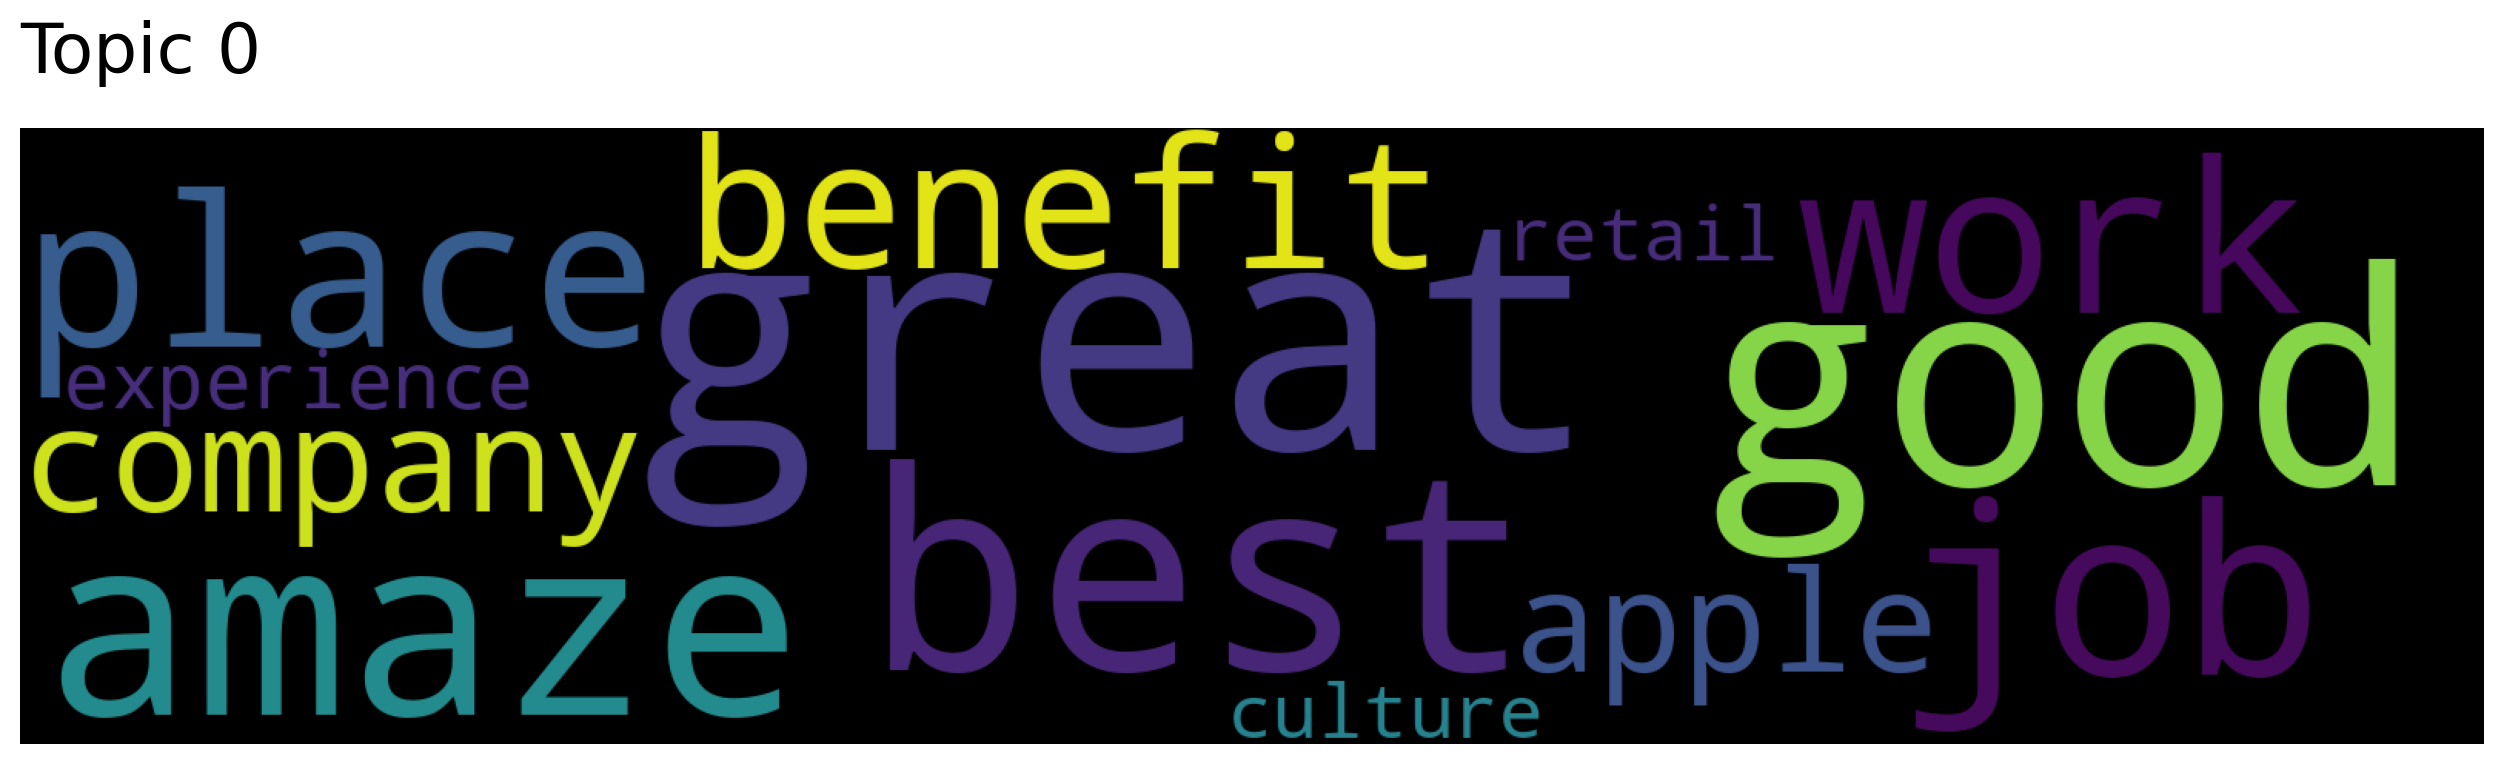

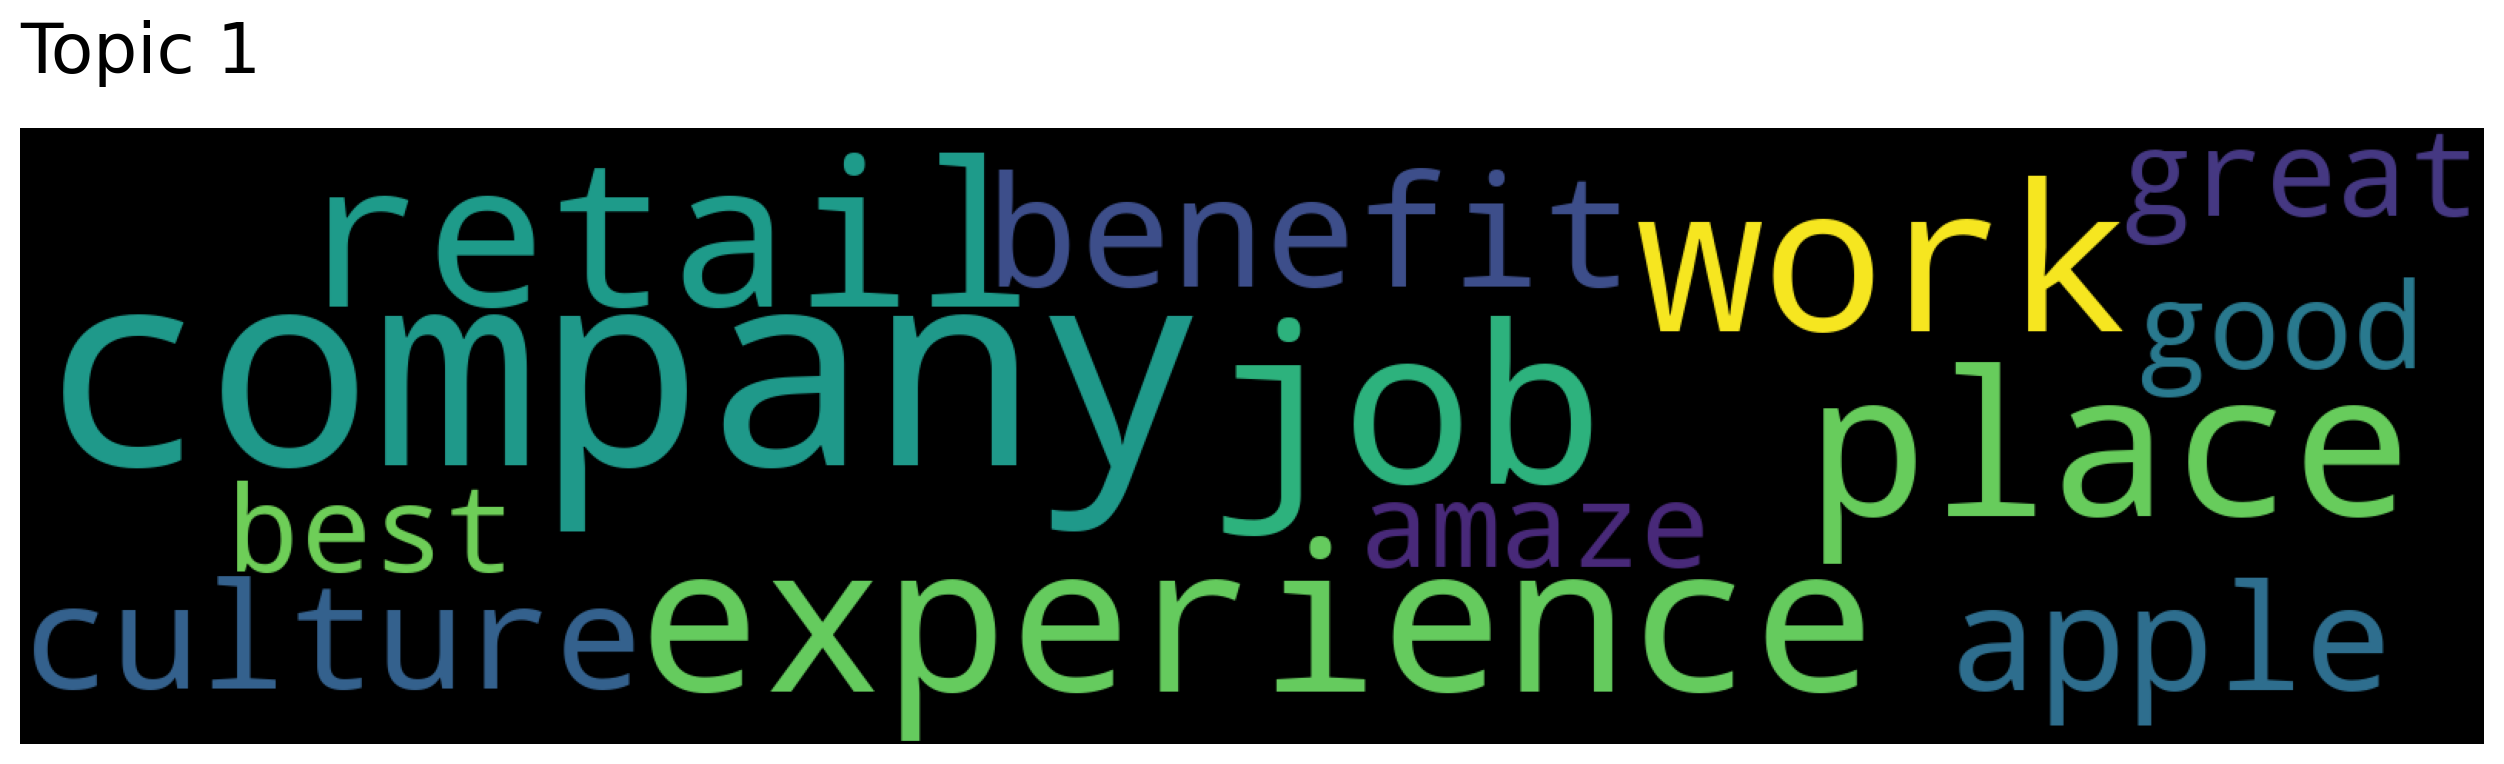

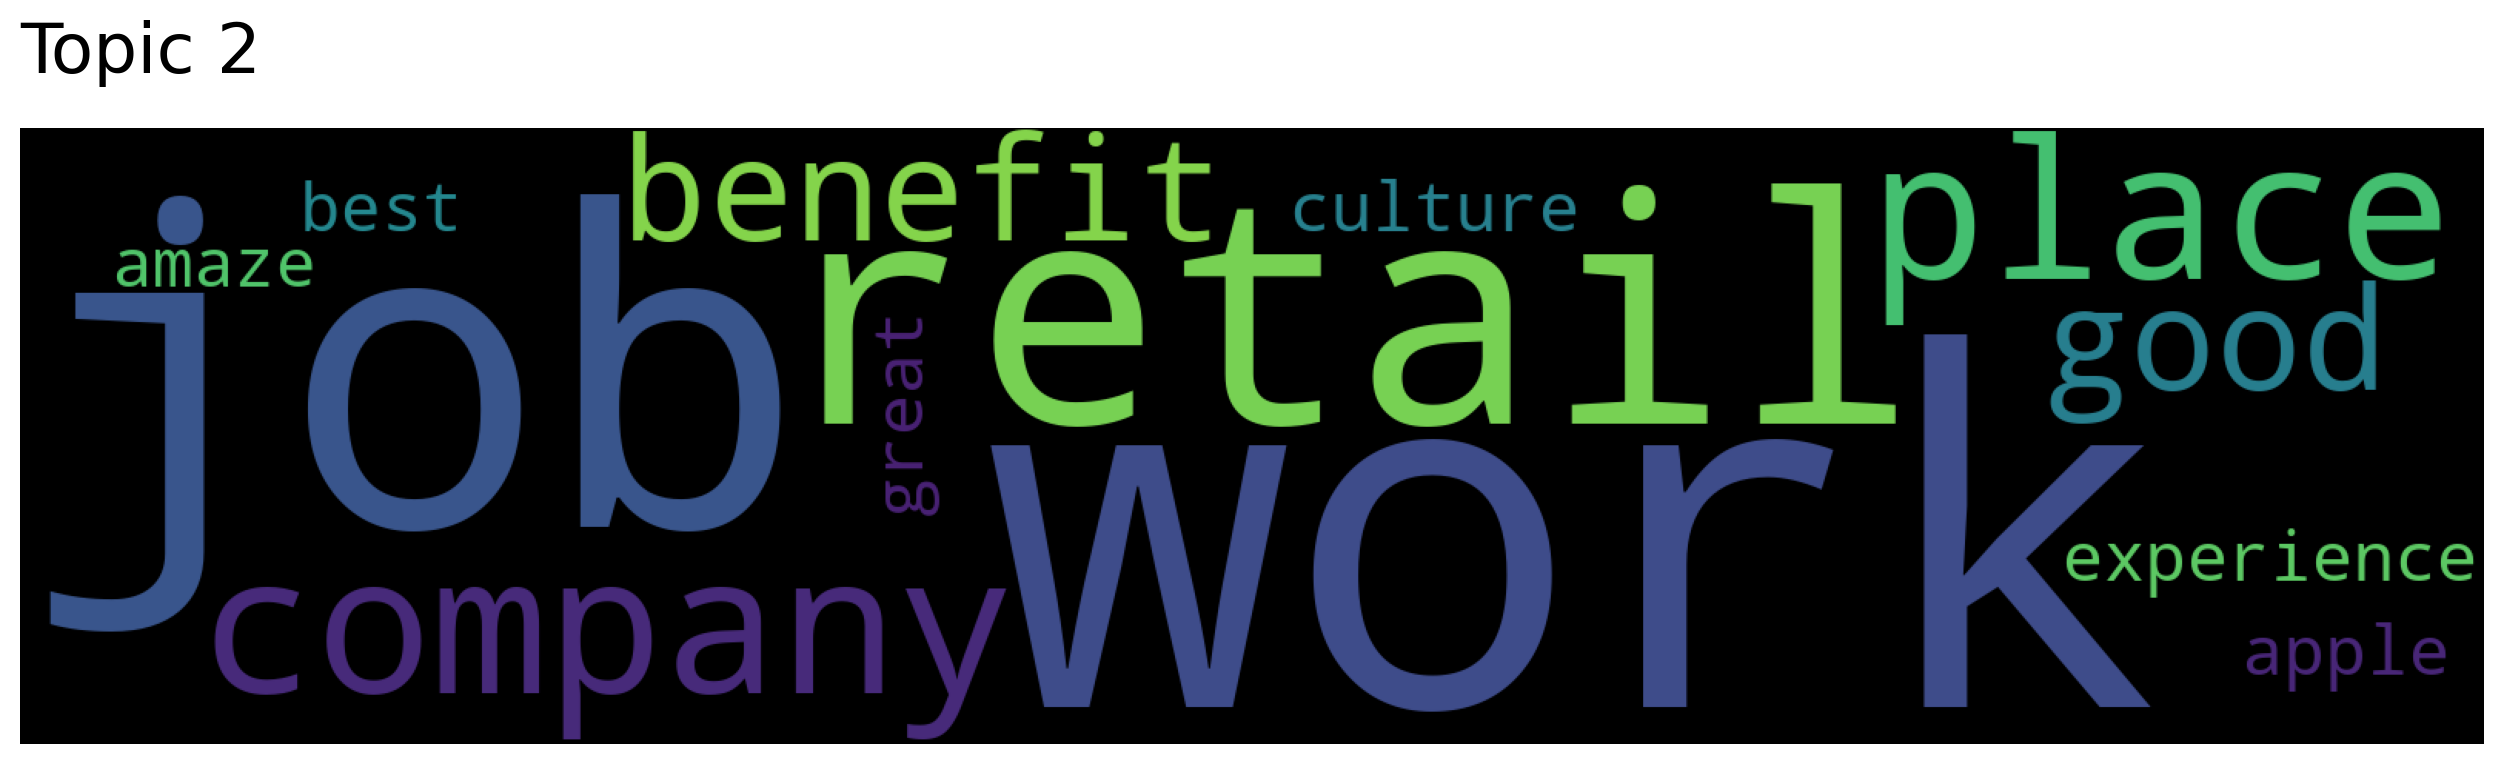

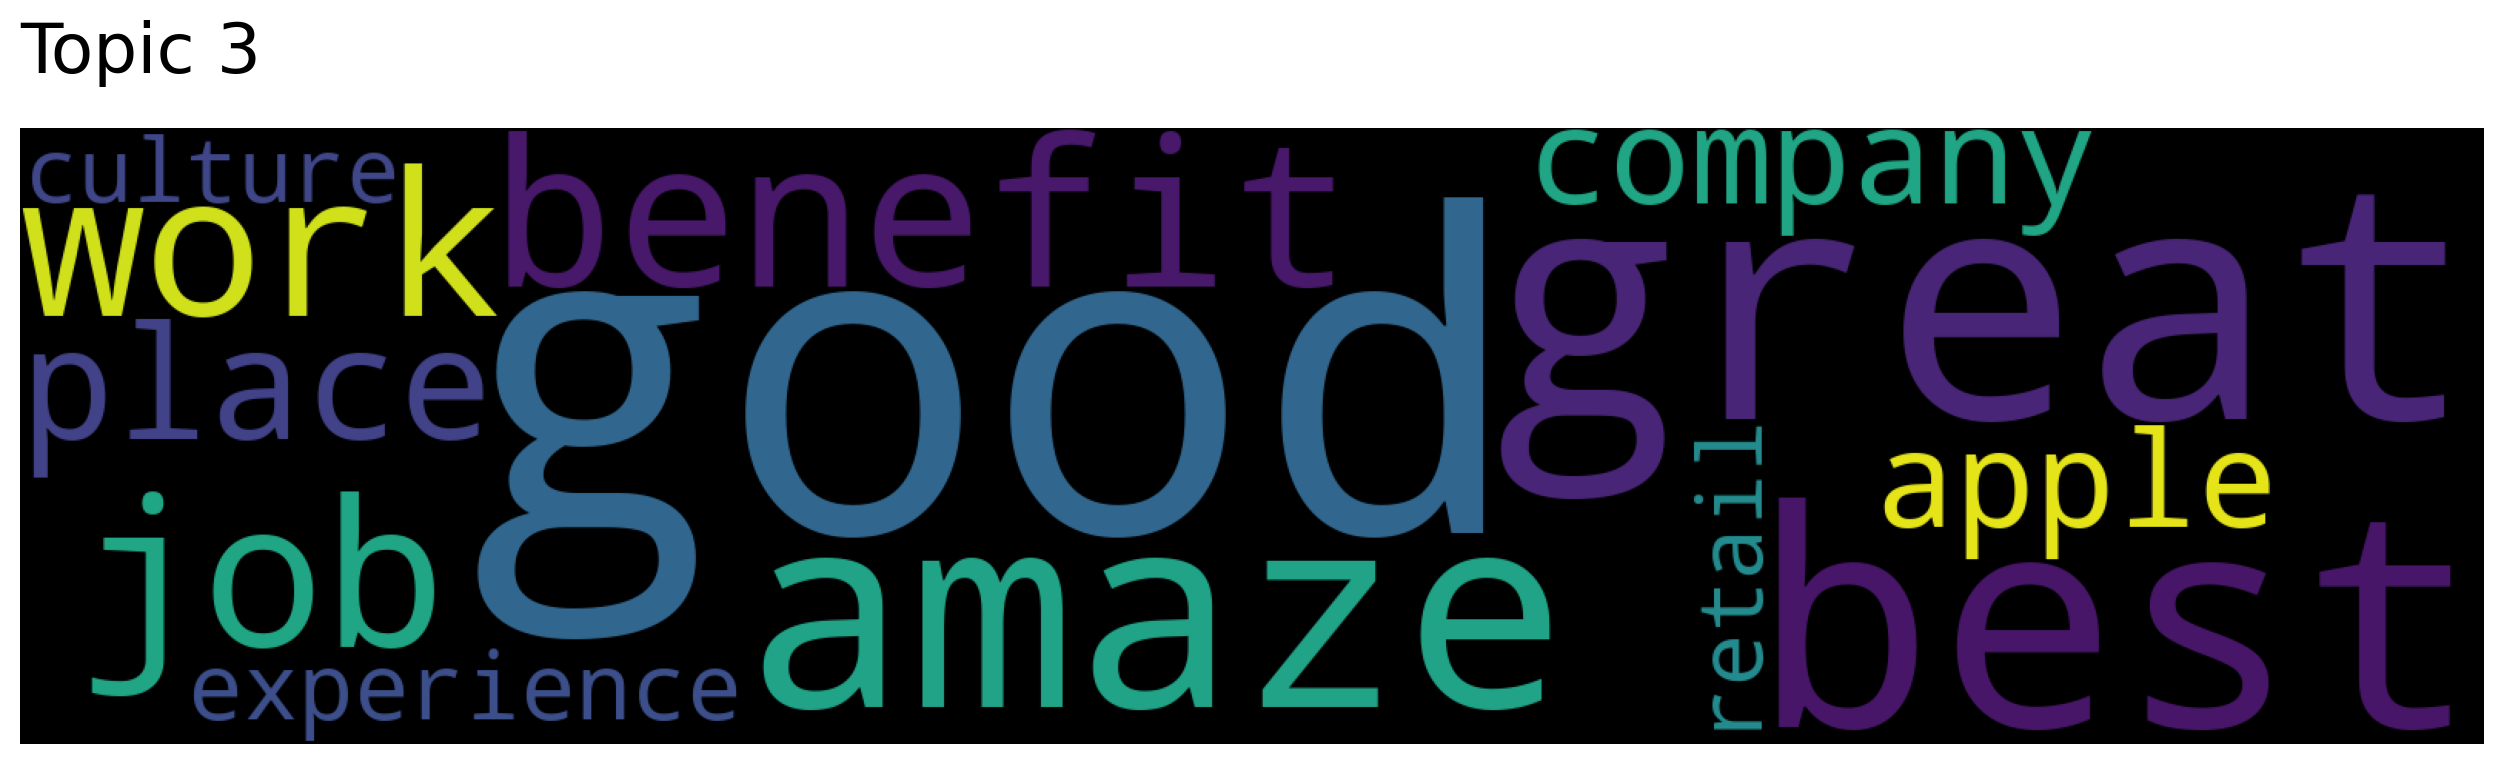

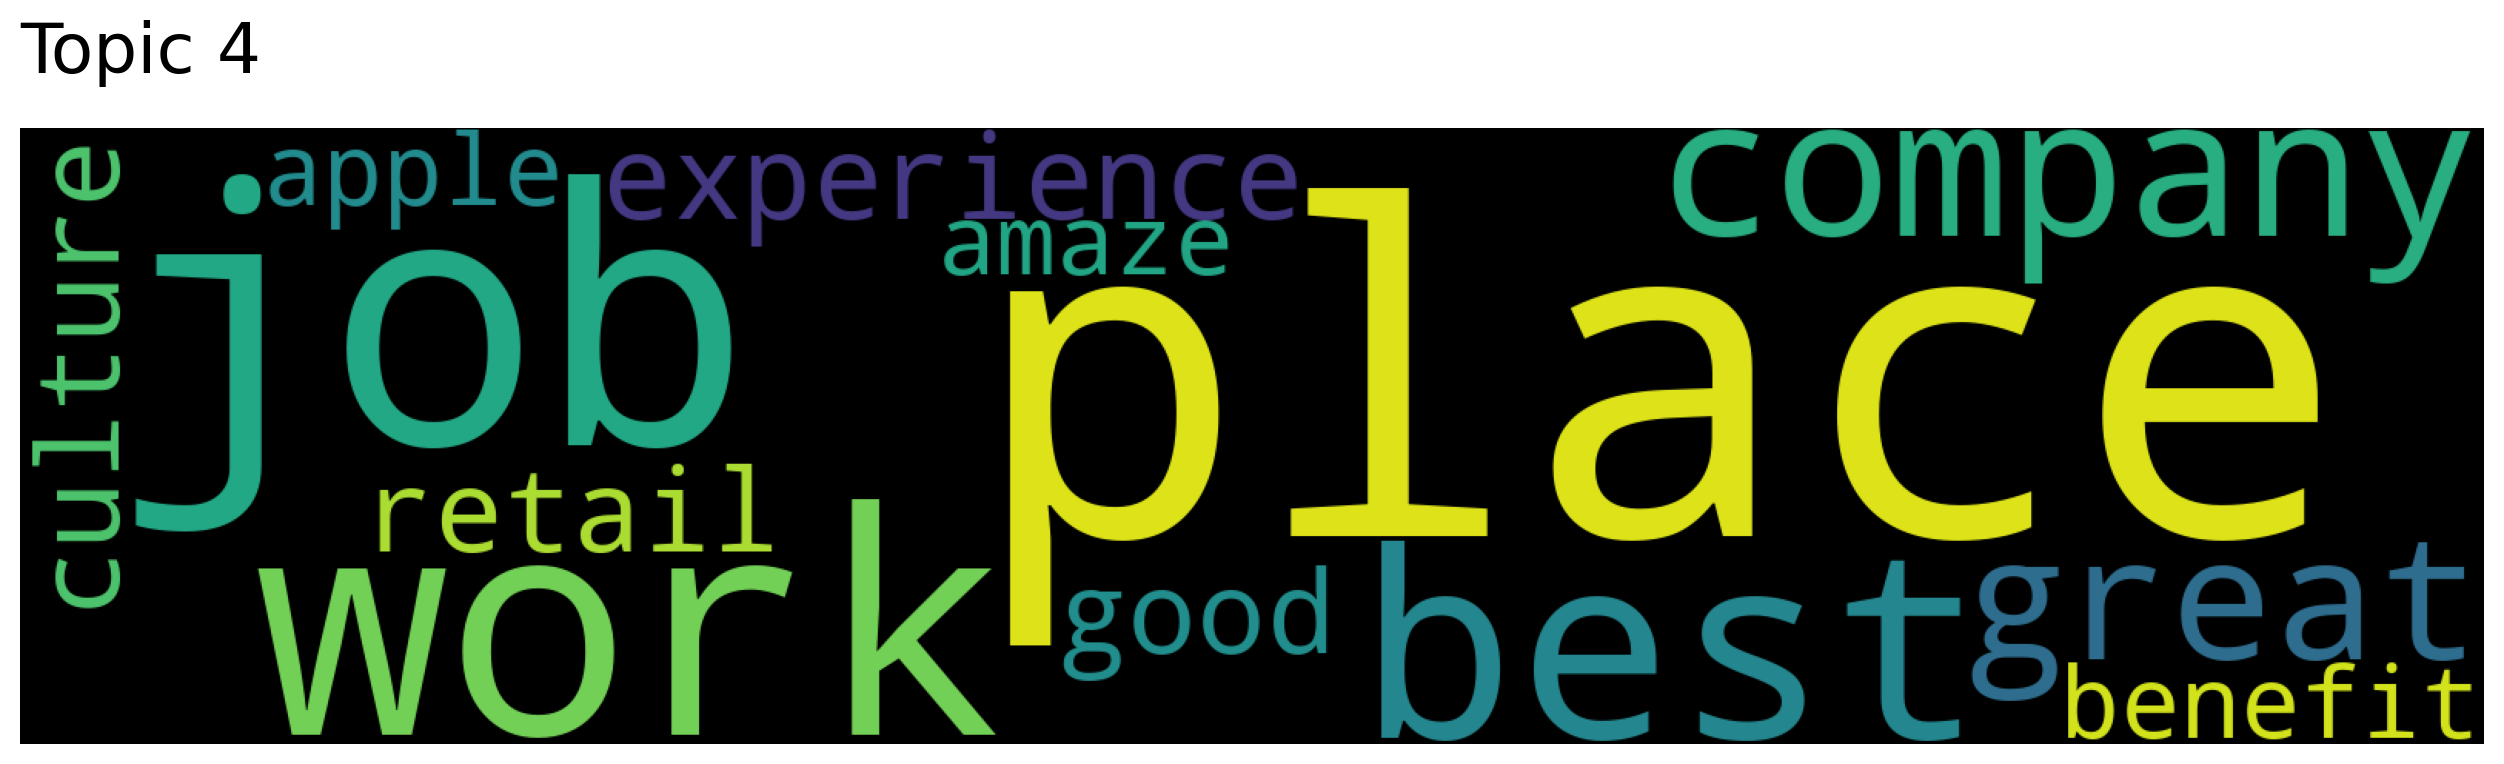

In [ ]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
for words, scores, num in zip(topic_words[:10], word_scores[:10], topic_nums[:5]):
    print(f"Topic {num}")
    for word, score in zip(words, scores):
        print(word, score)

Topic 0
great 0.9999659
good 0.84831107
best 0.70280814
amaze 0.51175725
job 0.36131376
place 0.3393086
work 0.33214605
benefit 0.31697297
company 0.2817732
apple 0.27355364
experience 0.2720817
culture 0.19010869
retail 0.18385261
Topic 1
company 0.9984028
job 0.4745692
experience 0.42728525
work 0.4137407
retail 0.39173257
place 0.37389666
benefit 0.36226535
culture 0.35694385
apple 0.3474177
great 0.29746825
good 0.2940848
best 0.29094213
amaze 0.2463923
Topic 2
work 0.99958026
job 0.7598421
retail 0.40812075
company 0.39726537
place 0.3972383
benefit 0.33779687
good 0.334898
experience 0.33265603
great 0.32963526
culture 0.31911916
apple 0.29935256
best 0.245712
amaze 0.23910704
Topic 3
good 0.9995085
great 0.85219884
best 0.6544414
amaze 0.44918305
benefit 0.34977448
job 0.34846354
work 0.34354806
place 0.30250645
company 0.28221658
apple 0.2705397
experience 0.20834431
culture 0.1606943
retail 0.14847127
Topic 4
place 0.9999107
job 0.43251926
work 0.3930168
best 0.37027073
compan

In [ ]:
print(f"topic_nums:{topic_nums}, topic_scores: {word_scores}")

for num in zip(topic_nums[:5]):
    print(f"Topic {num}")
    for word, score in zip(topic_words[num][:10], word_scores[num][:10]):
        print(f"{word:20}: {score}")

topic_nums:[0 1 2 3 4], topic_scores: [[0.9999659  0.84831107 0.70280814 0.51175725 0.36131376 0.3393086
  0.33214605 0.31697297 0.2817732  0.27355364 0.2720817  0.19010869
  0.18385261]
 [0.9984028  0.4745692  0.42728525 0.4137407  0.39173257 0.37389666
  0.36226535 0.35694385 0.3474177  0.29746825 0.2940848  0.29094213
  0.2463923 ]
 [0.99958026 0.7598421  0.40812075 0.39726537 0.3972383  0.33779687
  0.334898   0.33265603 0.32963526 0.31911916 0.29935256 0.245712
  0.23910704]
 [0.9995085  0.85219884 0.6544414  0.44918305 0.34977448 0.34846354
  0.34354806 0.30250645 0.28221658 0.2705397  0.20834431 0.1606943
  0.14847127]
 [0.9999107  0.43251926 0.3930168  0.37027073 0.35958523 0.33865413
  0.33723485 0.30484146 0.29758626 0.28280744 0.23443013 0.23127061
  0.21508895]]
Topic (0,)
great               : 0.9999659061431885
good                : 0.8483110666275024
best                : 0.702808141708374
amaze               : 0.5117572546005249
job                 : 0.36131376028060913

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(85)

ValueError: ignored

# BERTopic

In [ ]:
%pip install -q BERTopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 61.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic

berttopic_model = BERTopic(language="english")

In [ ]:
topics, probabilities = berttopic_model.fit_transform(applehead)

In [ ]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
cleaned_docs = berttopic_model._preprocess_text(applehead)
vectorizer = berttopic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topics = berttopic_model.get_topics()
topics.pop(-1, None)
topic_words = [
[word for word, _ in berttopic_model.get_topic(topic) if word != ""] for topic in topics
]
topic_words = [[words for words, _ in berttopic_model.get_topic(topic)]
        for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                          texts=tokens,
                          corpus=corpus,
                          dictionary=dictionary,
                          coherence='c_v')
coherence = coherence_model.get_coherence()

In [ ]:
coherence

0.3753774399322671

In [ ]:
freq_df = berttopic_model.get_topic_info()

In [ ]:
len(freq_df)

64

In [ ]:
fig1 = berttopic_model.visualize_topics()
fig1.show()

In [ ]:
fig2 = berttopic_model.visualize_barchart(top_n_topics = 64)
fig2.show()

In [ ]:
fig3 = berttopic_model.visualize_documents(applehead)
fig3.show()

In [ ]:
fig4 = berttopic_model.visualize_hierarchy()
fig4.show()

In [ ]:
berttopic_model.fit_transform(applepros)

([7,
  -1,
  -1,
  2,
  -1,
  -1,
  0,
  10,
  1,
  0,
  3,
  5,
  5,
  -1,
  18,
  -1,
  -1,
  -1,
  13,
  17,
  -1,
  6,
  9,
  5,
  5,
  6,
  2,
  2,
  2,
  -1,
  -1,
  32,
  -1,
  5,
  -1,
  8,
  17,
  -1,
  0,
  0,
  12,
  8,
  27,
  27,
  3,
  -1,
  -1,
  0,
  4,
  0,
  -1,
  -1,
  23,
  -1,
  3,
  26,
  0,
  0,
  9,
  0,
  13,
  -1,
  8,
  2,
  5,
  30,
  7,
  -1,
  6,
  4,
  4,
  -1,
  0,
  -1,
  14,
  21,
  21,
  30,
  -1,
  16,
  1,
  -1,
  -1,
  3,
  13,
  -1,
  4,
  22,
  11,
  -1,
  7,
  9,
  5,
  -1,
  8,
  24,
  13,
  -1,
  14,
  -1,
  8,
  1,
  0,
  4,
  22,
  -1,
  11,
  -1,
  -1,
  -1,
  8,
  -1,
  5,
  -1,
  16,
  -1,
  19,
  7,
  -1,
  -1,
  9,
  6,
  -1,
  22,
  22,
  0,
  -1,
  22,
  -1,
  -1,
  -1,
  7,
  10,
  1,
  8,
  9,
  26,
  0,
  12,
  0,
  -1,
  9,
  1,
  13,
  -1,
  -1,
  3,
  -1,
  16,
  -1,
  8,
  31,
  17,
  10,
  -1,
  -1,
  -1,
  2,
  -1,
  12,
  14,
  3,
  14,
  -1,
  2,
  -1,
  -1,
  12,
  26,
  7,
  -1,
  21,
  24,
  -1,
  12,
  0,
  20,
  -1,
  

In [ ]:
freq_df1 = berttopic_model.get_topic_info()

In [ ]:
len(freq_df1)

35

In [ ]:
fig1 = berttopic_model.visualize_topics()
fig1.show()

In [ ]:
fig2 = berttopic_model.visualize_barchart(top_n_topics = 35)
fig2.show()

In [ ]:
fig3 = berttopic_model.visualize_documents(applepros)
fig3.show()

In [ ]:
fig4 = berttopic_model.visualize_hierarchy()
fig4.show()

In [ ]:
cleaned_docs = berttopic_model._preprocess_text(applepros)
vectorizer = berttopic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topics = berttopic_model.get_topics()
topics.pop(-1, None)
topic_words = [
[word for word, _ in berttopic_model.get_topic(topic) if word != ""] for topic in topics
]
topic_words = [[words for words, _ in berttopic_model.get_topic(topic)]
        for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                          texts=tokens,
                          corpus=corpus,
                          dictionary=dictionary,
                          coherence='c_v')
coherence = coherence_model.get_coherence()

In [ ]:
coherence

0.40690447688515136

In [ ]:
berttopic_model.fit_transform(applecons)

([10,
  -1,
  -1,
  -1,
  0,
  6,
  5,
  2,
  18,
  0,
  4,
  8,
  8,
  -1,
  10,
  12,
  18,
  5,
  -1,
  -1,
  -1,
  3,
  -1,
  9,
  27,
  3,
  4,
  26,
  -1,
  -1,
  -1,
  -1,
  -1,
  19,
  0,
  18,
  1,
  -1,
  -1,
  -1,
  33,
  -1,
  8,
  8,
  0,
  18,
  6,
  0,
  39,
  2,
  4,
  8,
  26,
  -1,
  10,
  3,
  -1,
  -1,
  2,
  34,
  3,
  33,
  2,
  6,
  20,
  8,
  11,
  1,
  17,
  2,
  20,
  9,
  7,
  7,
  5,
  9,
  9,
  22,
  24,
  7,
  15,
  -1,
  12,
  41,
  3,
  -1,
  8,
  -1,
  16,
  17,
  3,
  -1,
  1,
  -1,
  -1,
  0,
  2,
  7,
  4,
  0,
  1,
  29,
  0,
  7,
  6,
  33,
  5,
  0,
  25,
  -1,
  0,
  0,
  1,
  39,
  7,
  20,
  -1,
  32,
  9,
  27,
  -1,
  -1,
  -1,
  -1,
  -1,
  1,
  -1,
  9,
  3,
  18,
  -1,
  39,
  3,
  -1,
  10,
  19,
  8,
  1,
  -1,
  0,
  0,
  2,
  31,
  -1,
  21,
  4,
  23,
  35,
  -1,
  1,
  28,
  0,
  25,
  2,
  -1,
  -1,
  31,
  2,
  27,
  -1,
  2,
  -1,
  36,
  -1,
  37,
  27,
  4,
  3,
  22,
  6,
  8,
  4,
  21,
  7,
  8,
  0,
  7,
  11,
  15,
  38,
  

In [ ]:
freq_df1 = berttopic_model.get_topic_info()
len(freq_df1)

43

In [ ]:
fig1 = berttopic_model.visualize_topics()
fig1.show()

In [ ]:
fig2 = berttopic_model.visualize_barchart(top_n_topics = 43)
fig2.show()

In [ ]:
fig3 = berttopic_model.visualize_documents(applecons)
fig3.show()

In [ ]:
fig4 = berttopic_model.visualize_hierarchy()
fig4.show()

In [ ]:
cleaned_docs = berttopic_model._preprocess_text(applecons)
vectorizer = berttopic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topics = berttopic_model.get_topics()
topics.pop(-1, None)
topic_words = [
[word for word, _ in berttopic_model.get_topic(topic) if word != ""] for topic in topics
]
topic_words = [[words for words, _ in berttopic_model.get_topic(topic)]
        for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                          texts=tokens,
                          corpus=corpus,
                          dictionary=dictionary,
                          coherence='c_v')
coherence = coherence_model.get_coherence()

In [ ]:
coherence

0.3713597924925181

# **Data Google**

In [ ]:
berttopic_model.fit_transform(googlehead)

([19,
  11,
  9,
  8,
  2,
  7,
  -1,
  10,
  47,
  10,
  13,
  48,
  53,
  47,
  56,
  -1,
  40,
  36,
  24,
  -1,
  14,
  29,
  37,
  6,
  6,
  -1,
  1,
  20,
  -1,
  3,
  22,
  20,
  3,
  -1,
  17,
  1,
  43,
  0,
  13,
  47,
  16,
  65,
  23,
  24,
  -1,
  0,
  23,
  30,
  4,
  61,
  44,
  4,
  49,
  37,
  0,
  21,
  42,
  47,
  47,
  44,
  27,
  6,
  50,
  12,
  -1,
  -1,
  0,
  1,
  65,
  46,
  4,
  59,
  27,
  12,
  -1,
  6,
  42,
  -1,
  51,
  18,
  43,
  8,
  4,
  9,
  9,
  -1,
  4,
  -1,
  11,
  11,
  8,
  5,
  50,
  50,
  0,
  10,
  9,
  35,
  6,
  14,
  0,
  34,
  -1,
  -1,
  7,
  1,
  1,
  4,
  61,
  6,
  -1,
  5,
  18,
  -1,
  20,
  10,
  5,
  26,
  32,
  0,
  20,
  0,
  5,
  12,
  11,
  7,
  31,
  0,
  30,
  21,
  60,
  7,
  19,
  -1,
  3,
  55,
  -1,
  19,
  13,
  13,
  4,
  4,
  41,
  14,
  7,
  17,
  56,
  20,
  13,
  13,
  4,
  1,
  -1,
  12,
  14,
  8,
  2,
  2,
  3,
  35,
  47,
  8,
  31,
  51,
  0,
  6,
  3,
  50,
  50,
  6,
  -1,
  14,
  14,
  30,
  2,
  -1,
  38

In [ ]:
freq_df1 = berttopic_model.get_topic_info()

In [ ]:
len(freq_df1)

70

In [ ]:
fig1 = berttopic_model.visualize_topics()
fig1.show()

In [ ]:
fig2 = berttopic_model.visualize_barchart(top_n_topics = 70)
fig2.show()

In [ ]:
fig3 = berttopic_model.visualize_documents(googlehead)
fig3.show()

In [ ]:
fig4 = berttopic_model.visualize_hierarchy()
fig4.show()

In [ ]:
cleaned_docs = berttopic_model._preprocess_text(googlehead)
vectorizer = berttopic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topics = berttopic_model.get_topics()
topics.pop(-1, None)
topic_words = [
[word for word, _ in berttopic_model.get_topic(topic) if word != ""] for topic in topics
]
topic_words = [[words for words, _ in berttopic_model.get_topic(topic)]
        for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                          texts=tokens,
                          corpus=corpus,
                          dictionary=dictionary,
                          coherence='c_v')
coherence = coherence_model.get_coherence()

In [ ]:
coherence

0.39493010060529105

In [ ]:
berttopic_model.fit_transform(googlepros)

([-1,
  0,
  22,
  17,
  -1,
  8,
  1,
  12,
  5,
  -1,
  11,
  27,
  -1,
  -1,
  -1,
  0,
  -1,
  2,
  10,
  -1,
  15,
  8,
  7,
  6,
  6,
  -1,
  11,
  -1,
  -1,
  -1,
  0,
  24,
  28,
  16,
  -1,
  12,
  26,
  -1,
  -1,
  30,
  6,
  3,
  -1,
  -1,
  -1,
  5,
  15,
  23,
  34,
  -1,
  9,
  2,
  -1,
  -1,
  4,
  0,
  1,
  -1,
  -1,
  8,
  4,
  -1,
  -1,
  -1,
  1,
  10,
  9,
  2,
  -1,
  -1,
  -1,
  5,
  10,
  11,
  16,
  -1,
  6,
  -1,
  -1,
  0,
  26,
  -1,
  -1,
  4,
  4,
  22,
  18,
  20,
  -1,
  0,
  7,
  30,
  0,
  0,
  -1,
  12,
  -1,
  2,
  -1,
  1,
  -1,
  -1,
  5,
  5,
  -1,
  -1,
  -1,
  4,
  2,
  33,
  9,
  20,
  9,
  3,
  5,
  24,
  -1,
  3,
  0,
  4,
  30,
  -1,
  31,
  15,
  5,
  -1,
  22,
  11,
  32,
  3,
  -1,
  28,
  -1,
  3,
  6,
  -1,
  7,
  18,
  -1,
  -1,
  6,
  14,
  36,
  0,
  -1,
  3,
  4,
  25,
  36,
  -1,
  -1,
  1,
  0,
  -1,
  18,
  1,
  7,
  7,
  4,
  2,
  -1,
  -1,
  5,
  17,
  0,
  -1,
  -1,
  8,
  8,
  7,
  0,
  1,
  1,
  18,
  6,
  -1,
  16,
  -1,
  2

In [ ]:
freq_df1 = berttopic_model.get_topic_info()

In [ ]:
len(freq_df1)

38

In [ ]:
fig1 = berttopic_model.visualize_topics()
fig1.show()

In [ ]:
fig2 = berttopic_model.visualize_barchart(top_n_topics = 38)
fig2.show()

In [ ]:
fig3 = berttopic_model.visualize_documents(googlepros)
fig3.show()

In [ ]:
fig4 = berttopic_model.visualize_hierarchy()
fig4.show()

In [ ]:
cleaned_docs = berttopic_model._preprocess_text(googlepros)
vectorizer = berttopic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topics = berttopic_model.get_topics()
topics.pop(-1, None)
topic_words = [
[word for word, _ in berttopic_model.get_topic(topic) if word != ""] for topic in topics
]
topic_words = [[words for words, _ in berttopic_model.get_topic(topic)]
        for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                          texts=tokens,
                          corpus=corpus,
                          dictionary=dictionary,
                          coherence='c_v')
coherence = coherence_model.get_coherence()

In [ ]:
coherence

0.3776844137535423

In [ ]:
berttopic_model.fit_transform(googlecons)

([15,
  -1,
  0,
  31,
  2,
  6,
  4,
  0,
  0,
  13,
  40,
  4,
  4,
  -1,
  -1,
  11,
  -1,
  9,
  22,
  5,
  7,
  -1,
  -1,
  9,
  9,
  25,
  29,
  -1,
  5,
  16,
  0,
  29,
  11,
  10,
  11,
  9,
  34,
  34,
  1,
  3,
  0,
  -1,
  36,
  11,
  1,
  20,
  -1,
  2,
  23,
  24,
  2,
  -1,
  -1,
  36,
  2,
  -1,
  37,
  16,
  16,
  11,
  5,
  25,
  -1,
  41,
  -1,
  10,
  0,
  41,
  29,
  1,
  5,
  -1,
  15,
  7,
  31,
  1,
  7,
  6,
  31,
  7,
  1,
  5,
  -1,
  8,
  8,
  0,
  36,
  12,
  -1,
  1,
  -1,
  -1,
  26,
  26,
  0,
  29,
  1,
  1,
  26,
  37,
  -1,
  27,
  8,
  8,
  43,
  14,
  14,
  42,
  17,
  3,
  4,
  27,
  -1,
  -1,
  23,
  0,
  -1,
  2,
  1,
  32,
  -1,
  14,
  42,
  28,
  8,
  -1,
  5,
  12,
  2,
  30,
  -1,
  6,
  -1,
  1,
  7,
  -1,
  11,
  20,
  45,
  45,
  -1,
  0,
  -1,
  -1,
  12,
  16,
  14,
  -1,
  25,
  25,
  -1,
  -1,
  4,
  -1,
  6,
  0,
  23,
  23,
  -1,
  -1,
  5,
  2,
  34,
  -1,
  1,
  26,
  7,
  1,
  1,
  39,
  1,
  -1,
  -1,
  34,
  -1,
  15,
  -1,
  2

In [ ]:
freq_df1 = berttopic_model.get_topic_info()

In [ ]:
len(freq_df1)

48

In [ ]:
fig1 = berttopic_model.visualize_topics()
fig1.show()

In [ ]:
fig2 = berttopic_model.visualize_barchart(top_n_topics = 50)
fig2.show()

In [ ]:
fig3 = berttopic_model.visualize_documents(googlecons)
fig3.show()

In [ ]:
fig4 = berttopic_model.visualize_hierarchy()
fig4.show()

In [ ]:
cleaned_docs = berttopic_model._preprocess_text(googlecons)
vectorizer = berttopic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topics = berttopic_model.get_topics()
topics.pop(-1, None)
topic_words = [
[word for word, _ in berttopic_model.get_topic(topic) if word != ""] for topic in topics
]
topic_words = [[words for words, _ in berttopic_model.get_topic(topic)]
        for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                          texts=tokens,
                          corpus=corpus,
                          dictionary=dictionary,
                          coherence='c_v')
coherence = coherence_model.get_coherence()

In [ ]:
coherence

0.3467455860903241

In [ ]:
berttopic_model.fit_transform(microsofthead)

([50,
  31,
  0,
  48,
  24,
  13,
  33,
  12,
  8,
  22,
  -1,
  -1,
  -1,
  17,
  4,
  37,
  1,
  18,
  0,
  3,
  4,
  45,
  -1,
  9,
  9,
  13,
  15,
  -1,
  -1,
  2,
  18,
  50,
  41,
  0,
  9,
  21,
  2,
  4,
  0,
  25,
  14,
  8,
  -1,
  -1,
  2,
  14,
  2,
  52,
  18,
  28,
  26,
  12,
  -1,
  7,
  10,
  1,
  52,
  2,
  2,
  65,
  -1,
  -1,
  -1,
  40,
  24,
  4,
  44,
  22,
  0,
  57,
  8,
  7,
  19,
  -1,
  -1,
  1,
  48,
  17,
  -1,
  -1,
  17,
  46,
  50,
  1,
  39,
  0,
  43,
  3,
  -1,
  11,
  5,
  -1,
  6,
  -1,
  19,
  2,
  2,
  26,
  48,
  -1,
  -1,
  61,
  -1,
  12,
  47,
  -1,
  31,
  32,
  -1,
  -1,
  1,
  23,
  6,
  20,
  16,
  53,
  1,
  50,
  -1,
  57,
  41,
  4,
  50,
  5,
  -1,
  12,
  -1,
  11,
  3,
  7,
  3,
  9,
  8,
  33,
  17,
  2,
  37,
  8,
  26,
  6,
  13,
  21,
  15,
  4,
  13,
  13,
  -1,
  56,
  -1,
  10,
  5,
  -1,
  61,
  34,
  3,
  25,
  -1,
  53,
  53,
  20,
  28,
  6,
  1,
  47,
  64,
  -1,
  27,
  0,
  56,
  45,
  11,
  19,
  -1,
  15,
  11,
  4

In [ ]:
freq_df1 = berttopic_model.get_topic_info()

In [ ]:
len(freq_df1)

71

In [ ]:
fig1 = berttopic_model.visualize_topics()
fig1.show()

In [ ]:
fig2 = berttopic_model.visualize_barchart(top_n_topics = 71)
fig2.show()

In [ ]:
fig3 = berttopic_model.visualize_documents(microsofthead)
fig3.show()

In [ ]:
fig4 = berttopic_model.visualize_hierarchy()
fig4.show()

In [ ]:
cleaned_docs = berttopic_model._preprocess_text(microsofthead)
vectorizer = berttopic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topics = berttopic_model.get_topics()
topics.pop(-1, None)
topic_words = [
[word for word, _ in berttopic_model.get_topic(topic) if word != ""] for topic in topics
]
topic_words = [[words for words, _ in berttopic_model.get_topic(topic)]
        for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                          texts=tokens,
                          corpus=corpus,
                          dictionary=dictionary,
                          coherence='c_v')
coherence = coherence_model.get_coherence()

In [ ]:
coherence

0.3641533141219468

In [ ]:
berttopic_model.fit_transform(microsoftpros)

([33,
  40,
  -1,
  -1,
  1,
  43,
  -1,
  -1,
  7,
  24,
  0,
  9,
  -1,
  37,
  2,
  8,
  -1,
  2,
  -1,
  42,
  11,
  9,
  26,
  30,
  0,
  9,
  -1,
  35,
  -1,
  0,
  5,
  17,
  -1,
  -1,
  29,
  12,
  -1,
  41,
  -1,
  14,
  9,
  32,
  2,
  4,
  21,
  0,
  0,
  3,
  2,
  24,
  14,
  -1,
  1,
  4,
  10,
  1,
  35,
  32,
  30,
  17,
  -1,
  23,
  -1,
  7,
  0,
  -1,
  7,
  34,
  16,
  8,
  12,
  8,
  9,
  -1,
  -1,
  13,
  19,
  39,
  -1,
  9,
  -1,
  16,
  -1,
  15,
  -1,
  -1,
  34,
  38,
  -1,
  5,
  2,
  0,
  0,
  0,
  -1,
  7,
  6,
  3,
  -1,
  3,
  -1,
  -1,
  -1,
  14,
  -1,
  15,
  -1,
  -1,
  16,
  9,
  -1,
  17,
  2,
  1,
  -1,
  21,
  2,
  -1,
  5,
  -1,
  10,
  4,
  35,
  -1,
  3,
  -1,
  6,
  -1,
  14,
  1,
  3,
  42,
  25,
  -1,
  1,
  -1,
  13,
  18,
  41,
  20,
  31,
  -1,
  33,
  -1,
  35,
  3,
  -1,
  -1,
  1,
  41,
  34,
  0,
  -1,
  5,
  3,
  4,
  -1,
  -1,
  -1,
  17,
  0,
  17,
  0,
  28,
  17,
  -1,
  -1,
  6,
  38,
  -1,
  -1,
  -1,
  -1,
  13,
  -1,
  27,
  

In [ ]:
freq_df1 = berttopic_model.get_topic_info()

In [ ]:
len(freq_df1)

45

In [ ]:
fig1 = berttopic_model.visualize_topics()
fig1.show()

In [ ]:
fig2 = berttopic_model.visualize_barchart(top_n_topics = 45)
fig2.show()

In [ ]:
fig3 = berttopic_model.visualize_documents(microsoftpros)
fig3.show()

In [ ]:
fig4 = berttopic_model.visualize_hierarchy()
fig4.show()

In [ ]:
cleaned_docs = berttopic_model._preprocess_text(microsoftpros)
vectorizer = berttopic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topics = berttopic_model.get_topics()
topics.pop(-1, None)
topic_words = [
[word for word, _ in berttopic_model.get_topic(topic) if word != ""] for topic in topics
]
topic_words = [[words for words, _ in berttopic_model.get_topic(topic)]
        for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                          texts=tokens,
                          corpus=corpus,
                          dictionary=dictionary,
                          coherence='c_v')
coherence = coherence_model.get_coherence()

In [ ]:
coherence

0.377716046222931

In [ ]:
berttopic_model.fit_transform(microsoftcons)

([-1,
  12,
  23,
  2,
  -1,
  48,
  21,
  15,
  5,
  36,
  -1,
  37,
  3,
  25,
  11,
  15,
  2,
  11,
  10,
  2,
  10,
  -1,
  27,
  24,
  2,
  33,
  -1,
  23,
  27,
  3,
  -1,
  5,
  3,
  -1,
  4,
  -1,
  30,
  11,
  -1,
  -1,
  -1,
  0,
  0,
  28,
  -1,
  -1,
  2,
  29,
  6,
  8,
  7,
  -1,
  27,
  13,
  15,
  0,
  0,
  30,
  -1,
  -1,
  -1,
  -1,
  30,
  -1,
  19,
  -1,
  2,
  5,
  -1,
  11,
  24,
  -1,
  5,
  -1,
  3,
  28,
  20,
  27,
  -1,
  27,
  0,
  -1,
  49,
  30,
  31,
  -1,
  -1,
  -1,
  8,
  0,
  4,
  47,
  5,
  8,
  -1,
  25,
  6,
  0,
  1,
  7,
  19,
  0,
  5,
  -1,
  -1,
  -1,
  18,
  20,
  2,
  11,
  7,
  3,
  -1,
  28,
  6,
  2,
  29,
  -1,
  24,
  -1,
  -1,
  -1,
  1,
  -1,
  22,
  32,
  2,
  15,
  -1,
  1,
  9,
  32,
  20,
  5,
  -1,
  14,
  19,
  15,
  8,
  -1,
  4,
  -1,
  5,
  5,
  7,
  -1,
  3,
  0,
  12,
  2,
  9,
  0,
  8,
  0,
  7,
  6,
  -1,
  0,
  2,
  -1,
  -1,
  -1,
  0,
  -1,
  8,
  0,
  -1,
  33,
  7,
  14,
  8,
  6,
  -1,
  -1,
  -1,
  20,
  18,
  1,

In [ ]:
freq_df1 = berttopic_model.get_topic_info()

In [ ]:
len(freq_df1)

52

In [ ]:
fig1 = berttopic_model.visualize_topics()
fig1.show()

In [ ]:
fig2 = berttopic_model.visualize_barchart(top_n_topics = 52)
fig2.show()

In [ ]:
fig3 = berttopic_model.visualize_documents(microsoftcons)
fig3.show()

In [ ]:
fig4 = berttopic_model.visualize_hierarchy()
fig4.show()

In [ ]:
cleaned_docs = berttopic_model._preprocess_text(microsoftcons)
vectorizer = berttopic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topics = berttopic_model.get_topics()
topics.pop(-1, None)
topic_words = [
[word for word, _ in berttopic_model.get_topic(topic) if word != ""] for topic in topics
]
topic_words = [[words for words, _ in berttopic_model.get_topic(topic)]
        for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                          texts=tokens,
                          corpus=corpus,
                          dictionary=dictionary,
                          coherence='c_v')
coherence = coherence_model.get_coherence()

In [ ]:
coherence

0.3684832175778755

In [ ]:
%pip install -q openpyxl

In [ ]:
%pip install -q xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 1.9 MB/s eta 0:00:00


In [ ]:
out_path1 = r'C:\Users\thaic\Downloads\myiso2\Interns64summer\032023\berttop1.xlsx'

with pd.ExcelWriter(out_path1, engine='xlsxwriter') as writer:
    df1.to_excel(writer, sheet_name='berttopic1', index=False)

writer.save()

In [ ]:
coherence_pertopic = coherence_model.get_coherence_per_topic()

In [ ]:
coherence_pertopic

[0.35077939981910167,
 0.09790225855946362,
 0.3928970470932017,
 0.45936115102513647,
 0.39472723138993643,
 0.7756306810366022,
 0.17977300066495272,
 0.39480766866222317,
 0.382877171964807,
 0.43272169892623735]

In [ ]:
import matplotlib.pyplot as plt

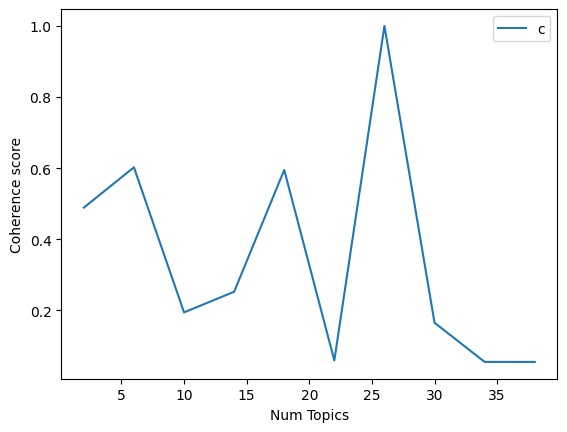

In [ ]:
limit=40; start=2; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_pertopic)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
from evaluation import Trainer, DataLoader